# Classifying the level of damage from accident data.

## Data Overview

## Dataset Description

## Files

* **Praktikum_2_ML(train).csv** - Dataset untuk train / dilatih
* **Praktikum_2_ML(test).csv** - Dataset untuk test / menghasilkan submisi
* **Praktikum_2_ML(contoh).csv** - Contoh format pengumpulan

## Columns

* `crash_record_id` - ID unik yang mengidentifikasi setiap catatan kecelakaan.
* `tanggal_kecelakaan` - Tanggal terjadinya kecelakaan.
* `longitude` - Koordinat garis bujur lokasi kecelakaan.
* `latitude` - Koordinat garis lintang lokasi kecelakaan.
* `batas_kecepatan_terpasang` - Batas kecepatan yang terpasang di lokasi kecelakaan.
* `kondisi_perangkat` - Status perangkat yang terlibat dalam kecelakaan (misalnya, berfungsi/tidak berfungsi).
* `kondisi_cuaca` - Kondisi cuaca saat kecelakaan terjadi (misalnya, cerah, hujan, berkabut).
* `kondisi_pencahayaan` - Kondisi pencahayaan pada saat kecelakaan (misalnya, terang, gelap, senja).
* `jenis_jalan` - Jenis jalan di mana kecelakaan terjadi.
* `kondisi_permukaan_jalan` - Deskripsi kondisi permukaan jalan (misalnya, kering, basah, berlubang).
* `cacat_jalan` - Keberadaan cacat atau kerusakan pada jalan.
* `jenis_laporan` - Tipe laporan kecelakaan.
* `jenis_tabrakan_pertama` - Tipe tabrakan yang pertama terjadi (misalnya, tabrakan depan, samping).
* `jenis_kecelakaan` - Kategori umum kecelakaan.
* `jumlah_unit` - Jumlah kendaraan yang terlibat dalam kecelakaan.
* `penyebab_kecelakaan_utama` - Penyebab utama yang diidentifikasi untuk kecelakaan.
* `penyebab_kecelakaan_lain` - Penyebab lain yang mungkin berkontribusi pada kecelakaan.
* `cedera_terparah` - Jenis cedera terparah yang dialami.
* `jumlah_cedera` - Total jumlah cedera yang dilaporkan.
* `cedera_fatal` - Jumlah cedera yang berujung pada kematian.
* `cedera_serius` - Jumlah cedera serius yang dilaporkan.
* `cedera_tidak_serius` - Jumlah cedera yang tidak serius.
* `cedera_dilaporkan_tidak_nyata` - Jumlah cedera yang dilaporkan tetapi tidak dapat diidentifikasi.
* `tidak_ada_indikasi_cedera` - Jumlah kasus di mana tidak ada indikasi cedera.
* `kerusakan` - Deskripsi mengenai kerusakan yang terjadi pada kendaraan atau properti.


## Importing Libraries

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Reading Datasets

In [214]:
df = pd.read_csv('Praktikum_2_ML(train).csv')

In [215]:
df.head().T

,0,1,2,3,4
crash_record_id,1bc86617362be59edff39dc8eb3110c8521809fd59975c...,7af6ea16e1773daeab1b4955bd1a2997e22a66133f751d...,aa7e5680ae512f08cfceac7995088be2f6e6768d4462fb...,8868b3d93fce810fb2bb641ef2e6825642e5159f8d608b...,715439ffa95de3a122edf10654426e7f6ecedcd5398aab...
tanggal_kecelakaan,06/01/2018 04:35:00 PM,02/06/2019 03:30:00 PM,06/17/2017 10:05:00 PM,08/09/2023 12:20:00 PM,09/17/2023 04:19:00 PM
longitude,-87.723019,-87.678016,-87.702085,-87.659829,-87.774777
latitude,41.785826,41.924513,41.946539,41.696878,41.971278
batas_kecepatan_terpasang,30,30,30,35,20
kondisi_perangkat,NO CONTROLS,NO CONTROLS,UNKNOWN,NO CONTROLS,NO CONTROLS
kondisi_cuaca,CLEAR,CLEAR,UNKNOWN,CLEAR,CLEAR
kondisi_pencahayaan,DAYLIGHT,DARKNESS,"DARKNESS, LIGHTED ROAD",DAYLIGHT,DAYLIGHT
jenis_jalan,NOT DIVIDED,NOT DIVIDED,PARKING LOT,NOT DIVIDED,ONE-WAY
kondisi_permukaan_jalan,DRY,DRY,UNKNOWN,DRY,DRY


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id                11250 non-null  object 
 1   tanggal_kecelakaan             11250 non-null  object 
 2   longitude                      11250 non-null  float64
 3   latitude                       11250 non-null  float64
 4   batas_kecepatan_terpasang      11250 non-null  int64  
 5   kondisi_perangkat              11250 non-null  object 
 6   kondisi_cuaca                  11250 non-null  object 
 7   kondisi_pencahayaan            11250 non-null  object 
 8   jenis_jalan                    11250 non-null  object 
 9   kondisi_permukaan_jalan        11250 non-null  object 
 10  cacat_jalan                    11250 non-null  object 
 11  jenis_laporan                  11250 non-null  object 
 12  jenis_tabrakan_pertama         11250 non-null 

In [217]:
df.tail()

,crash_record_id,tanggal_kecelakaan,longitude,latitude,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,...,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,jumlah_cedera,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera,kerusakan
11245,e71e5a43b4d220f5678c3e6dc7a61d5f90d4c817afac56...,12/12/2020 06:00:00 PM,-87.740532,41.741866,30,OTHER,RAIN,"DARKNESS, LIGHTED ROAD",FOUR WAY,WET,...,FAILING TO REDUCE SPEED TO AVOID CRASH,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
11246,f4e097a601599b5fa2ce120c193ec34bd8894570c272a9...,03/03/2023 05:50:00 PM,-87.620425,41.894304,25,NO CONTROLS,CLEAR,DARKNESS,ONE-WAY,DRY,...,IMPROPER OVERTAKING/PASSING,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
11247,8b23320b596ec57560b25a95fcacaeb356bbe753c71cb1...,04/04/2016 01:40:00 PM,-87.672291,41.895880,30,NO CONTROLS,RAIN,DAYLIGHT,NOT DIVIDED,WET,...,IMPROPER LANE USAGE,FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,"OVER $1,500"
11248,a8755873f051a358d33315a6c5ecabb6de3d06b3465523...,07/22/2017 06:50:00 PM,-87.656059,41.946569,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ONE-WAY,DRY,...,IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
11249,737b3c40f4a6f9b8188c278e292b75b2d6d2f2323814fb...,06/24/2019 06:15:00 AM,-87.626723,41.887443,30,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",OTHER,DRY,...,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,"OVER $1,500"


In [218]:
df.isnull().sum()

crash_record_id                  0
tanggal_kecelakaan               0
longitude                        0
latitude                         0
batas_kecepatan_terpasang        0
kondisi_perangkat                0
kondisi_cuaca                    0
kondisi_pencahayaan              0
jenis_jalan                      0
kondisi_permukaan_jalan          0
cacat_jalan                      0
jenis_laporan                    0
jenis_tabrakan_pertama           0
jenis_kecelakaan                 0
jumlah_unit                      0
penyebab_kecelakaan_utama        0
penyebab_kecelakaan_lain         0
cedera_terparah                  0
jumlah_cedera                    0
cedera_fatal                     0
cedera_serius                    0
cedera_tidak_serius              0
cedera_dilaporkan_tidak_nyata    0
tidak_ada_indikasi_cedera        0
kerusakan                        0
dtype: int64

In [219]:
df.isna().sum()

crash_record_id                  0
tanggal_kecelakaan               0
longitude                        0
latitude                         0
batas_kecepatan_terpasang        0
kondisi_perangkat                0
kondisi_cuaca                    0
kondisi_pencahayaan              0
jenis_jalan                      0
kondisi_permukaan_jalan          0
cacat_jalan                      0
jenis_laporan                    0
jenis_tabrakan_pertama           0
jenis_kecelakaan                 0
jumlah_unit                      0
penyebab_kecelakaan_utama        0
penyebab_kecelakaan_lain         0
cedera_terparah                  0
jumlah_cedera                    0
cedera_fatal                     0
cedera_serius                    0
cedera_tidak_serius              0
cedera_dilaporkan_tidak_nyata    0
tidak_ada_indikasi_cedera        0
kerusakan                        0
dtype: int64

In [220]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,11250.0,-87.653972,1.432811,-87.905309,-87.719382,-87.671269,-87.633000,0.00000
latitude,11250.0,41.848897,0.688929,0.000000,41.787208,41.876697,41.925263,42.02266
batas_kecepatan_terpasang,11250.0,28.165067,6.263075,0.000000,30.000000,30.000000,30.000000,99.00000
jumlah_unit,11250.0,2.011200,0.394489,1.000000,2.000000,2.000000,2.000000,8.00000
jumlah_cedera,11250.0,0.166933,0.489420,0.000000,0.000000,0.000000,0.000000,6.00000
cedera_fatal,11250.0,0.000444,0.021078,0.000000,0.000000,0.000000,0.000000,1.00000
cedera_serius,11250.0,0.018489,0.150902,0.000000,0.000000,0.000000,0.000000,3.00000
cedera_tidak_serius,11250.0,0.094311,0.371073,0.000000,0.000000,0.000000,0.000000,6.00000
cedera_dilaporkan_tidak_nyata,11250.0,0.053689,0.274817,0.000000,0.000000,0.000000,0.000000,5.00000
tidak_ada_indikasi_cedera,11250.0,1.966044,1.126895,0.000000,1.000000,2.000000,2.000000,34.00000


In [221]:
df.nunique()

crash_record_id                  11250
tanggal_kecelakaan               11156
longitude                        10190
latitude                         10190
batas_kecepatan_terpasang           19
kondisi_perangkat                    8
kondisi_cuaca                       11
kondisi_pencahayaan                  6
jenis_jalan                         20
kondisi_permukaan_jalan              7
cacat_jalan                          7
jenis_laporan                        3
jenis_tabrakan_pertama              17
jenis_kecelakaan                     2
jumlah_unit                          8
penyebab_kecelakaan_utama           39
penyebab_kecelakaan_lain            40
cedera_terparah                      5
jumlah_cedera                        7
cedera_fatal                         2
cedera_serius                        4
cedera_tidak_serius                  7
cedera_dilaporkan_tidak_nyata        6
tidak_ada_indikasi_cedera           15
kerusakan                            3
dtype: int64

## Data Pre-Processing

We can see that `crash_record_id` has no effect on the prediction because it is an identifier, since this we can drop this column

In [222]:
df.drop(labels='crash_record_id',axis=1,inplace=True)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tanggal_kecelakaan             11250 non-null  object 
 1   longitude                      11250 non-null  float64
 2   latitude                       11250 non-null  float64
 3   batas_kecepatan_terpasang      11250 non-null  int64  
 4   kondisi_perangkat              11250 non-null  object 
 5   kondisi_cuaca                  11250 non-null  object 
 6   kondisi_pencahayaan            11250 non-null  object 
 7   jenis_jalan                    11250 non-null  object 
 8   kondisi_permukaan_jalan        11250 non-null  object 
 9   cacat_jalan                    11250 non-null  object 
 10  jenis_laporan                  11250 non-null  object 
 11  jenis_tabrakan_pertama         11250 non-null  object 
 12  jenis_kecelakaan               11250 non-null 

#### Convert Datetime Format from `tanggal_kecelakaan` to Integer - Timestamp

 Convert the datetime column to a pandas datetime object

In [224]:
df['tanggal_kecelakaan'] = pd.to_datetime(df['tanggal_kecelakaan'])

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tanggal_kecelakaan             11250 non-null  datetime64[ns]
 1   longitude                      11250 non-null  float64       
 2   latitude                       11250 non-null  float64       
 3   batas_kecepatan_terpasang      11250 non-null  int64         
 4   kondisi_perangkat              11250 non-null  object        
 5   kondisi_cuaca                  11250 non-null  object        
 6   kondisi_pencahayaan            11250 non-null  object        
 7   jenis_jalan                    11250 non-null  object        
 8   kondisi_permukaan_jalan        11250 non-null  object        
 9   cacat_jalan                    11250 non-null  object        
 10  jenis_laporan                  11250 non-null  object        
 11  jenis_tabrakan_

In [226]:
df['tanggal_kecelakaan'].head()

0   2018-06-01 16:35:00
1   2019-02-06 15:30:00
2   2017-06-17 22:05:00
3   2023-08-09 12:20:00
4   2023-09-17 16:19:00
Name: tanggal_kecelakaan, dtype: datetime64[ns]

Convert the datetime column to an integer then divide the resulting integer by the number of nanoseconds in a second

In [227]:
df['tanggal_kecelakaan'] = df['tanggal_kecelakaan'].values.astype(int)
df['tanggal_kecelakaan'] = df['tanggal_kecelakaan'].div(10**9)

In [228]:
df['tanggal_kecelakaan'].head()

0    0.287836
1   -0.298799
2    0.074217
3    1.642095
4    1.334086
Name: tanggal_kecelakaan, dtype: float64

In [229]:
df.head()

,tanggal_kecelakaan,longitude,latitude,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,cacat_jalan,...,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,jumlah_cedera,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera,kerusakan
0,0.287836,-87.723019,41.785826,30,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,NO DEFECTS,...,FAILING TO YIELD RIGHT-OF-WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,"OVER $1,500"
1,-0.298799,-87.678016,41.924513,30,NO CONTROLS,CLEAR,DARKNESS,NOT DIVIDED,DRY,NO DEFECTS,...,IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
2,0.074217,-87.702085,41.946539,30,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKING LOT,UNKNOWN,UNKNOWN,...,EXCEEDING SAFE SPEED FOR CONDITIONS,EXCEEDING SAFE SPEED FOR CONDITIONS,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,"$501 - $1,500"
3,1.642095,-87.659829,41.696878,35,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,NO DEFECTS,...,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
4,1.334086,-87.774777,41.971278,20,NO CONTROLS,CLEAR,DAYLIGHT,ONE-WAY,DRY,NO DEFECTS,...,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,"OVER $1,500"


In [230]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['kondisi_perangkat', 'kondisi_cuaca', 'kondisi_pencahayaan', 'jenis_jalan', 'kondisi_permukaan_jalan', 'cacat_jalan', 'jenis_laporan', 'jenis_tabrakan_pertama', 'jenis_kecelakaan', 'penyebab_kecelakaan_utama', 'penyebab_kecelakaan_lain', 'cedera_terparah', 'kerusakan']
Numerical Variables:
['tanggal_kecelakaan', 'longitude', 'latitude', 'batas_kecepatan_terpasang', 'jumlah_unit', 'jumlah_cedera', 'cedera_fatal', 'cedera_serius', 'cedera_tidak_serius', 'cedera_dilaporkan_tidak_nyata', 'tidak_ada_indikasi_cedera']


In [231]:
for col in cat_cols:
    print(f"{col}")
    print(f"{df[col].unique()[:20].tolist()}\n\n")

kondisi_perangkat
['NO CONTROLS', 'UNKNOWN', 'FUNCTIONING PROPERLY', 'FUNCTIONING IMPROPERLY', 'NOT FUNCTIONING', 'OTHER', 'WORN REFLECTIVE MATERIAL', 'MISSING']


kondisi_cuaca
['CLEAR', 'UNKNOWN', 'RAIN', 'SNOW', 'CLOUDY/OVERCAST', 'FREEZING RAIN/DRIZZLE', 'FOG/SMOKE/HAZE', 'OTHER', 'SLEET/HAIL', 'BLOWING SNOW', 'SEVERE CROSS WIND GATE']


kondisi_pencahayaan
['DAYLIGHT', 'DARKNESS', 'DARKNESS, LIGHTED ROAD', 'DUSK', 'UNKNOWN', 'DAWN']


jenis_jalan
['NOT DIVIDED', 'PARKING LOT', 'ONE-WAY', 'DIVIDED - W/MEDIAN (NOT RAISED)', 'FOUR WAY', 'DRIVEWAY', 'T-INTERSECTION', 'DIVIDED - W/MEDIAN BARRIER', 'UNKNOWN', 'FIVE POINT, OR MORE', 'ALLEY', 'RAMP', 'CENTER TURN LANE', 'OTHER', 'L-INTERSECTION', 'TRAFFIC ROUTE', 'UNKNOWN INTERSECTION TYPE', 'Y-INTERSECTION', 'NOT REPORTED', 'ROUNDABOUT']


kondisi_permukaan_jalan
['DRY', 'UNKNOWN', 'WET', 'ICE', 'SNOW OR SLUSH', 'OTHER', 'SAND, MUD, DIRT']


cacat_jalan
['NO DEFECTS', 'UNKNOWN', 'RUT, HOLES', 'SHOULDER DEFECT', 'OTHER', 'WORN SURFACE', '

In [232]:
for col in cat_cols:
    print(f"{col} has 'UNKNOWN' value",df[df[col] == 'UNKNOWN'][col].count())

kondisi_perangkat has 'UNKNOWN' value 729
kondisi_cuaca has 'UNKNOWN' value 597
kondisi_pencahayaan has 'UNKNOWN' value 479
jenis_jalan has 'UNKNOWN' value 133
kondisi_permukaan_jalan has 'UNKNOWN' value 916
cacat_jalan has 'UNKNOWN' value 1907
jenis_laporan has 'UNKNOWN' value 0
jenis_tabrakan_pertama has 'UNKNOWN' value 0
jenis_kecelakaan has 'UNKNOWN' value 0
penyebab_kecelakaan_utama has 'UNKNOWN' value 0
penyebab_kecelakaan_lain has 'UNKNOWN' value 0
cedera_terparah has 'UNKNOWN' value 0
kerusakan has 'UNKNOWN' value 0


### Explorartory Data Analytics (EDA)

tanggal_kecelakaan
Skew : -0.01


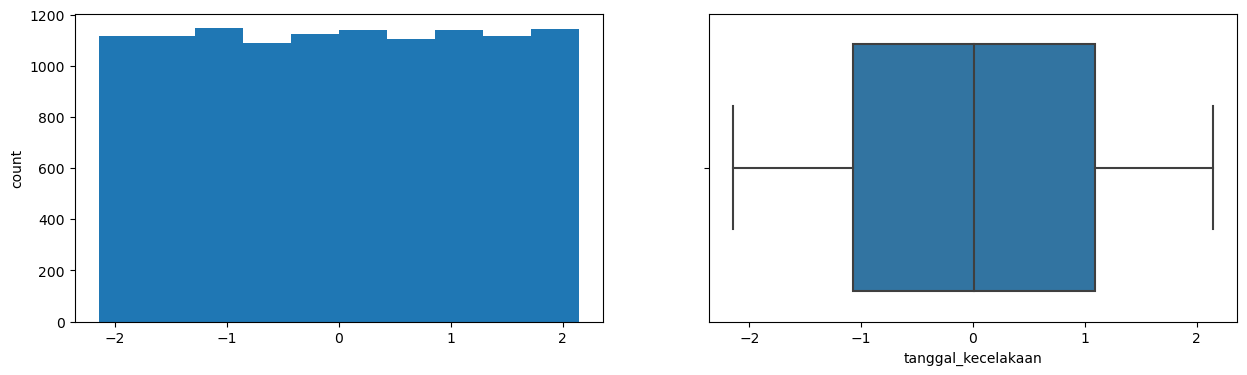

longitude
Skew : 61.07


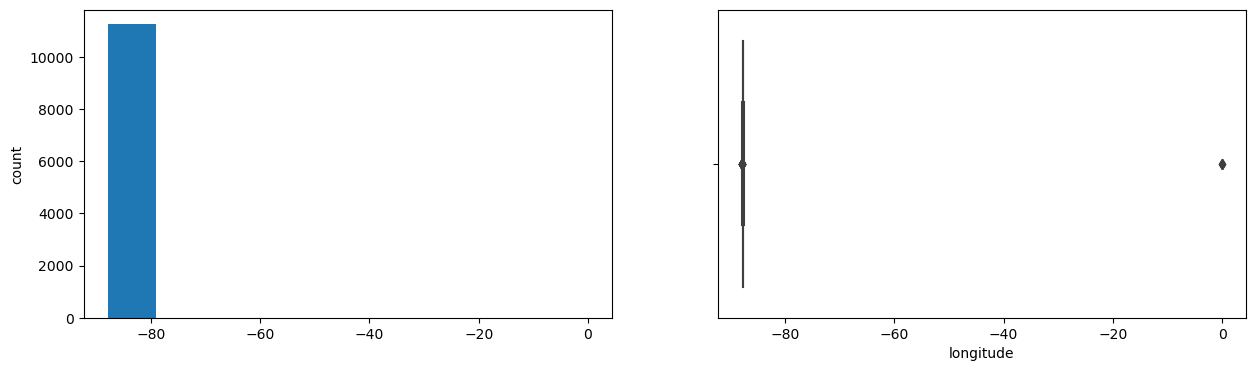

latitude
Skew : -59.79


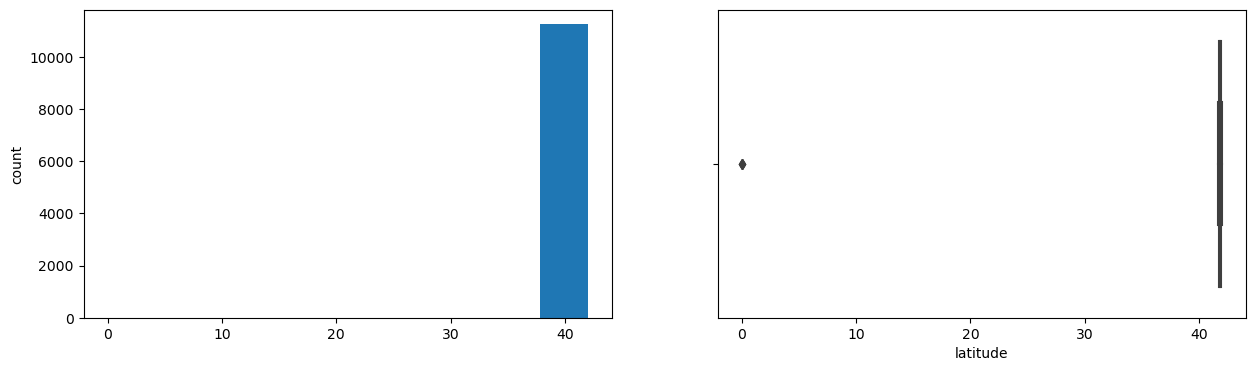

batas_kecepatan_terpasang
Skew : -1.8


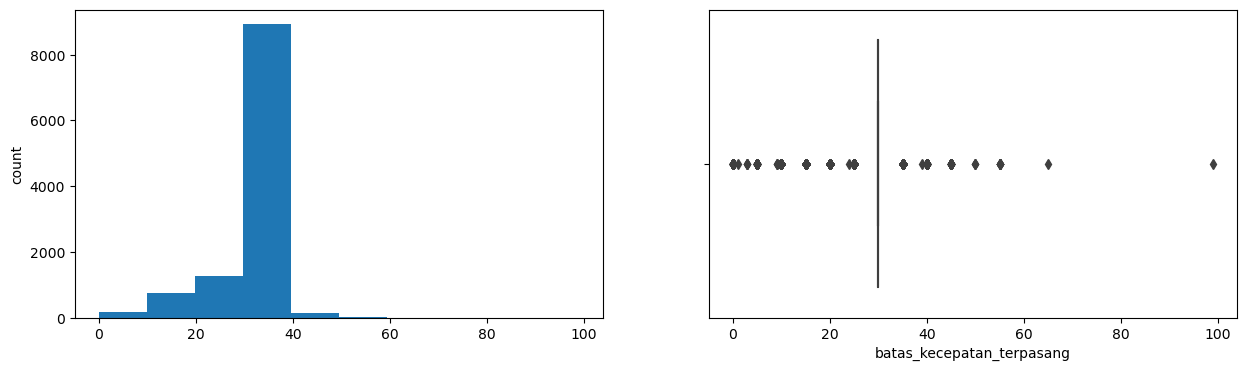

jumlah_unit
Skew : 2.39


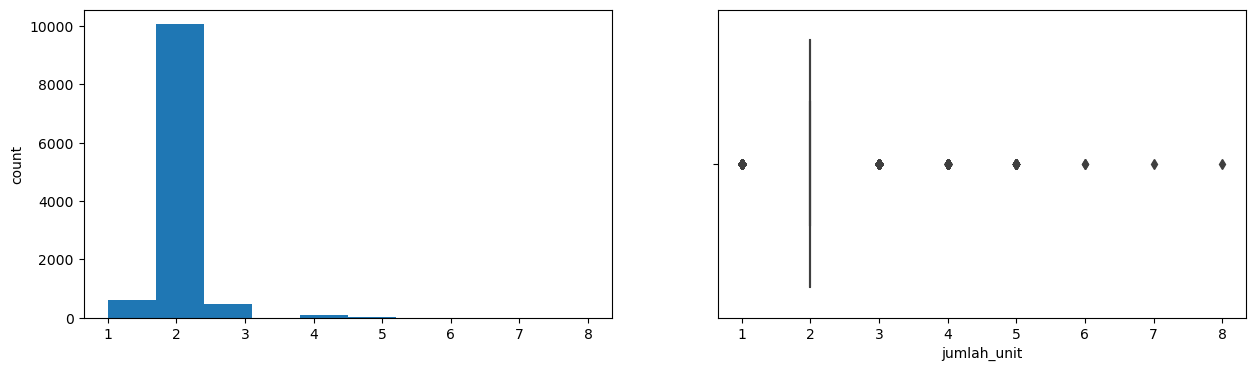

jumlah_cedera
Skew : 4.18


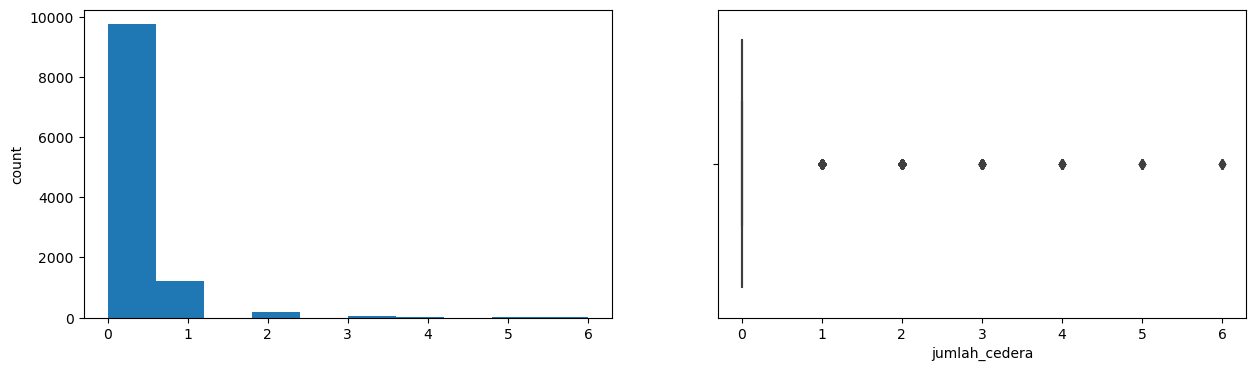

cedera_fatal
Skew : 47.41


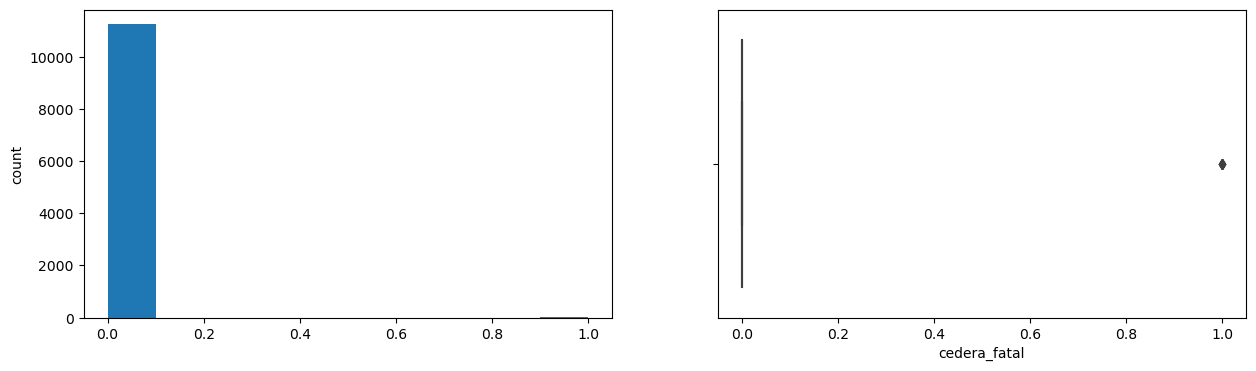

cedera_serius
Skew : 9.67


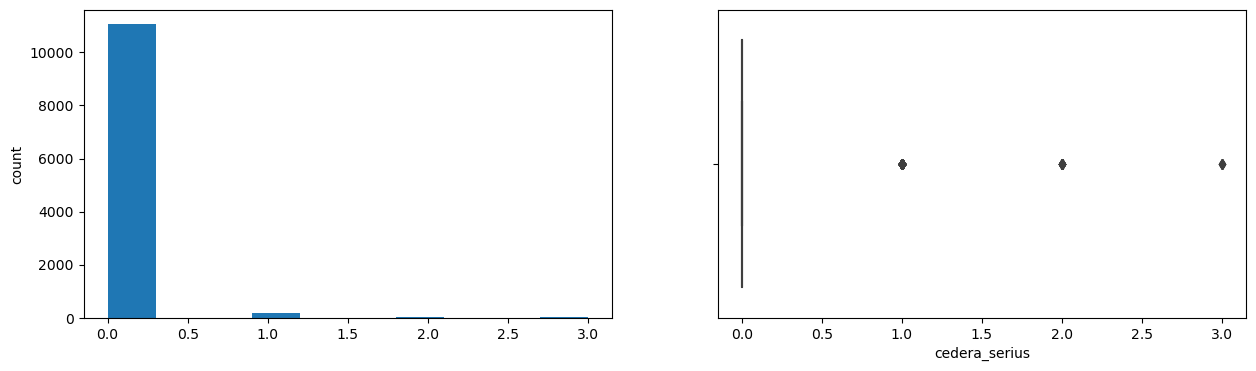

cedera_tidak_serius
Skew : 5.64


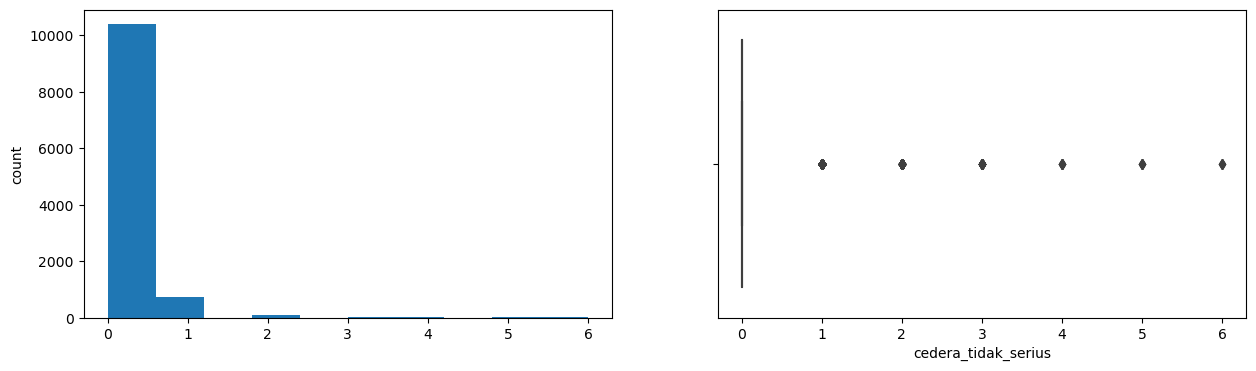

cedera_dilaporkan_tidak_nyata
Skew : 6.54


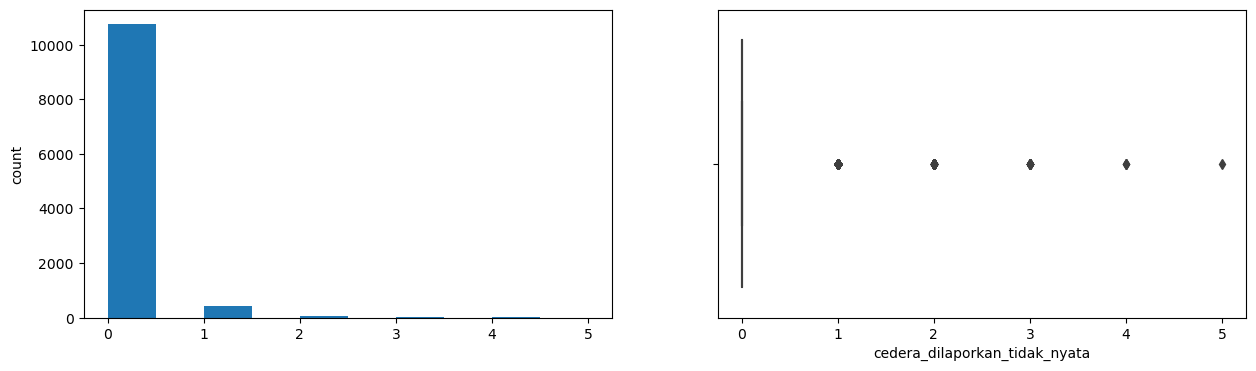

tidak_ada_indikasi_cedera
Skew : 4.46


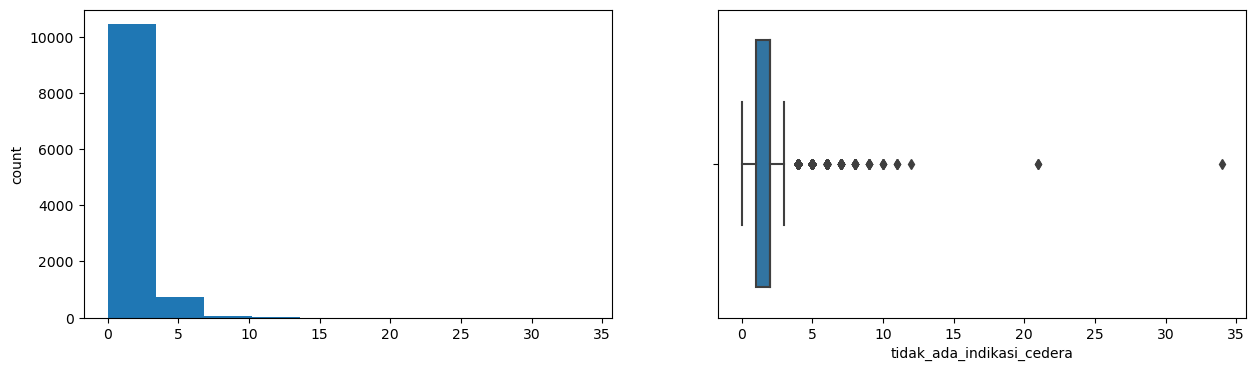

In [233]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

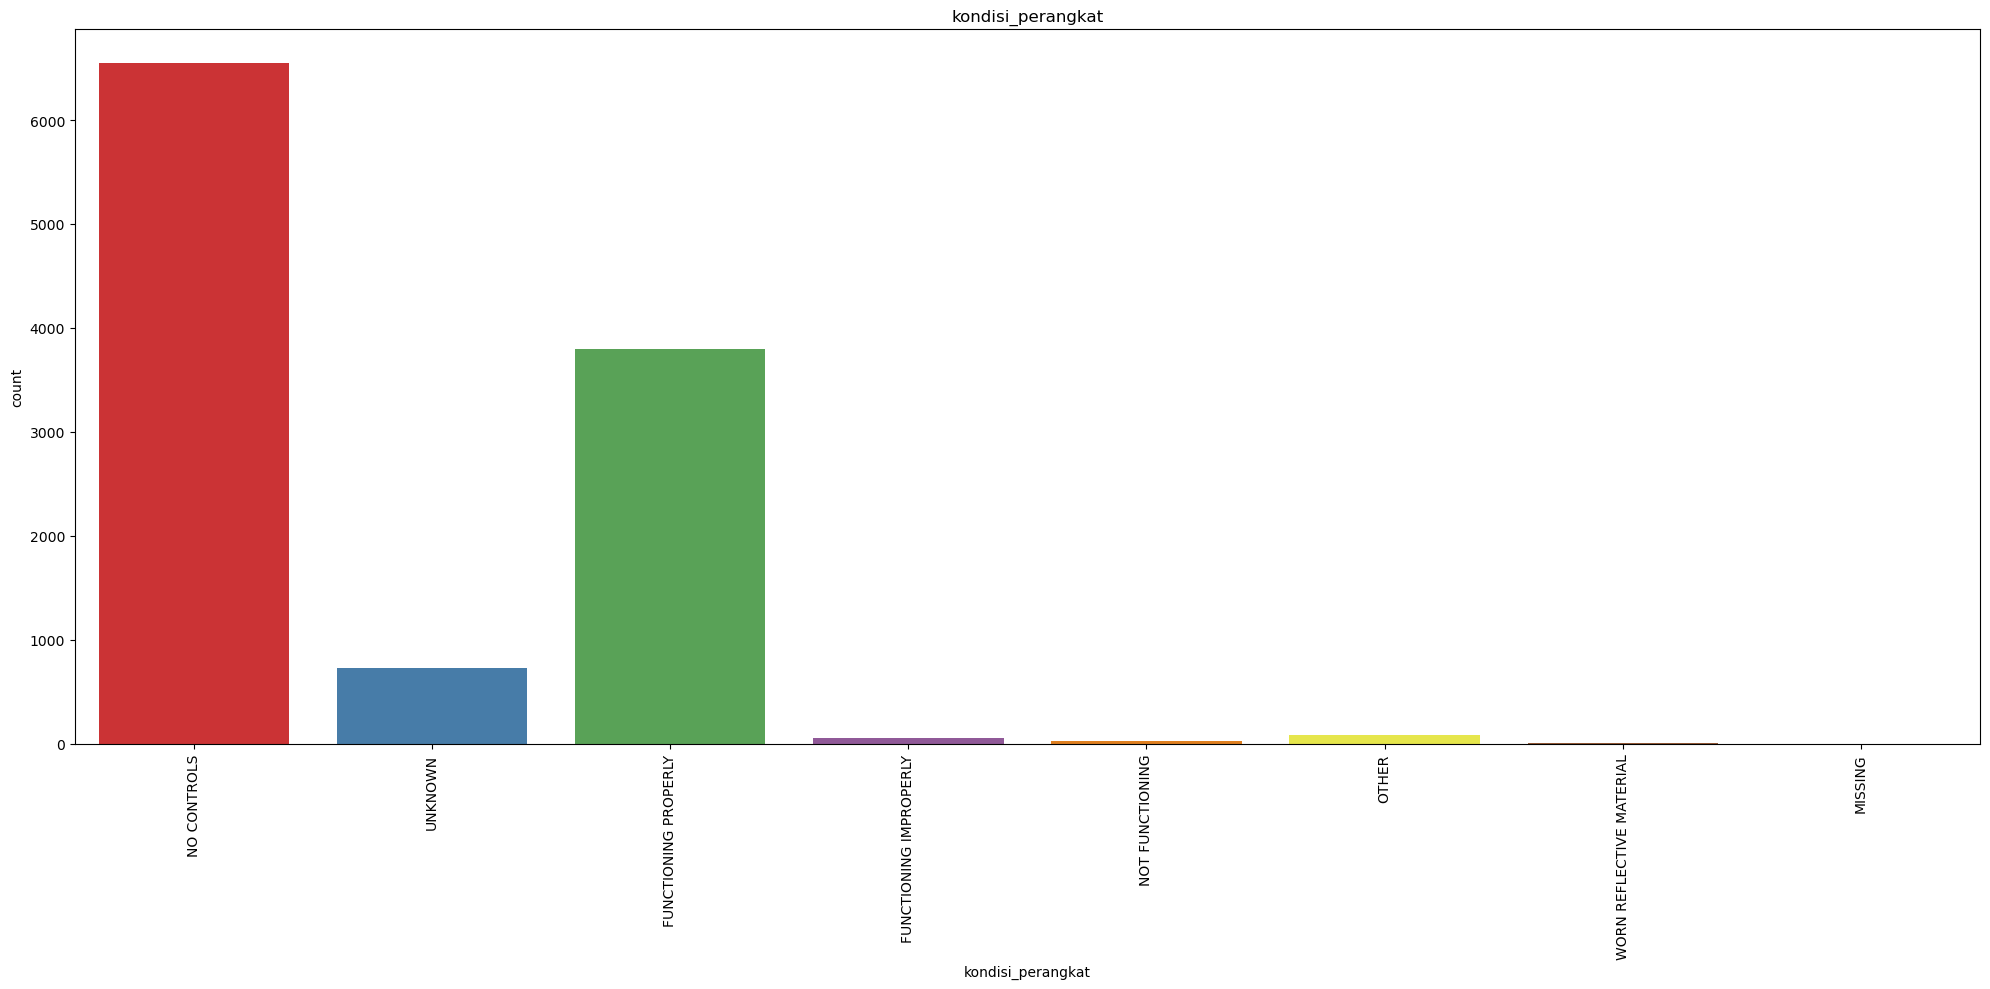

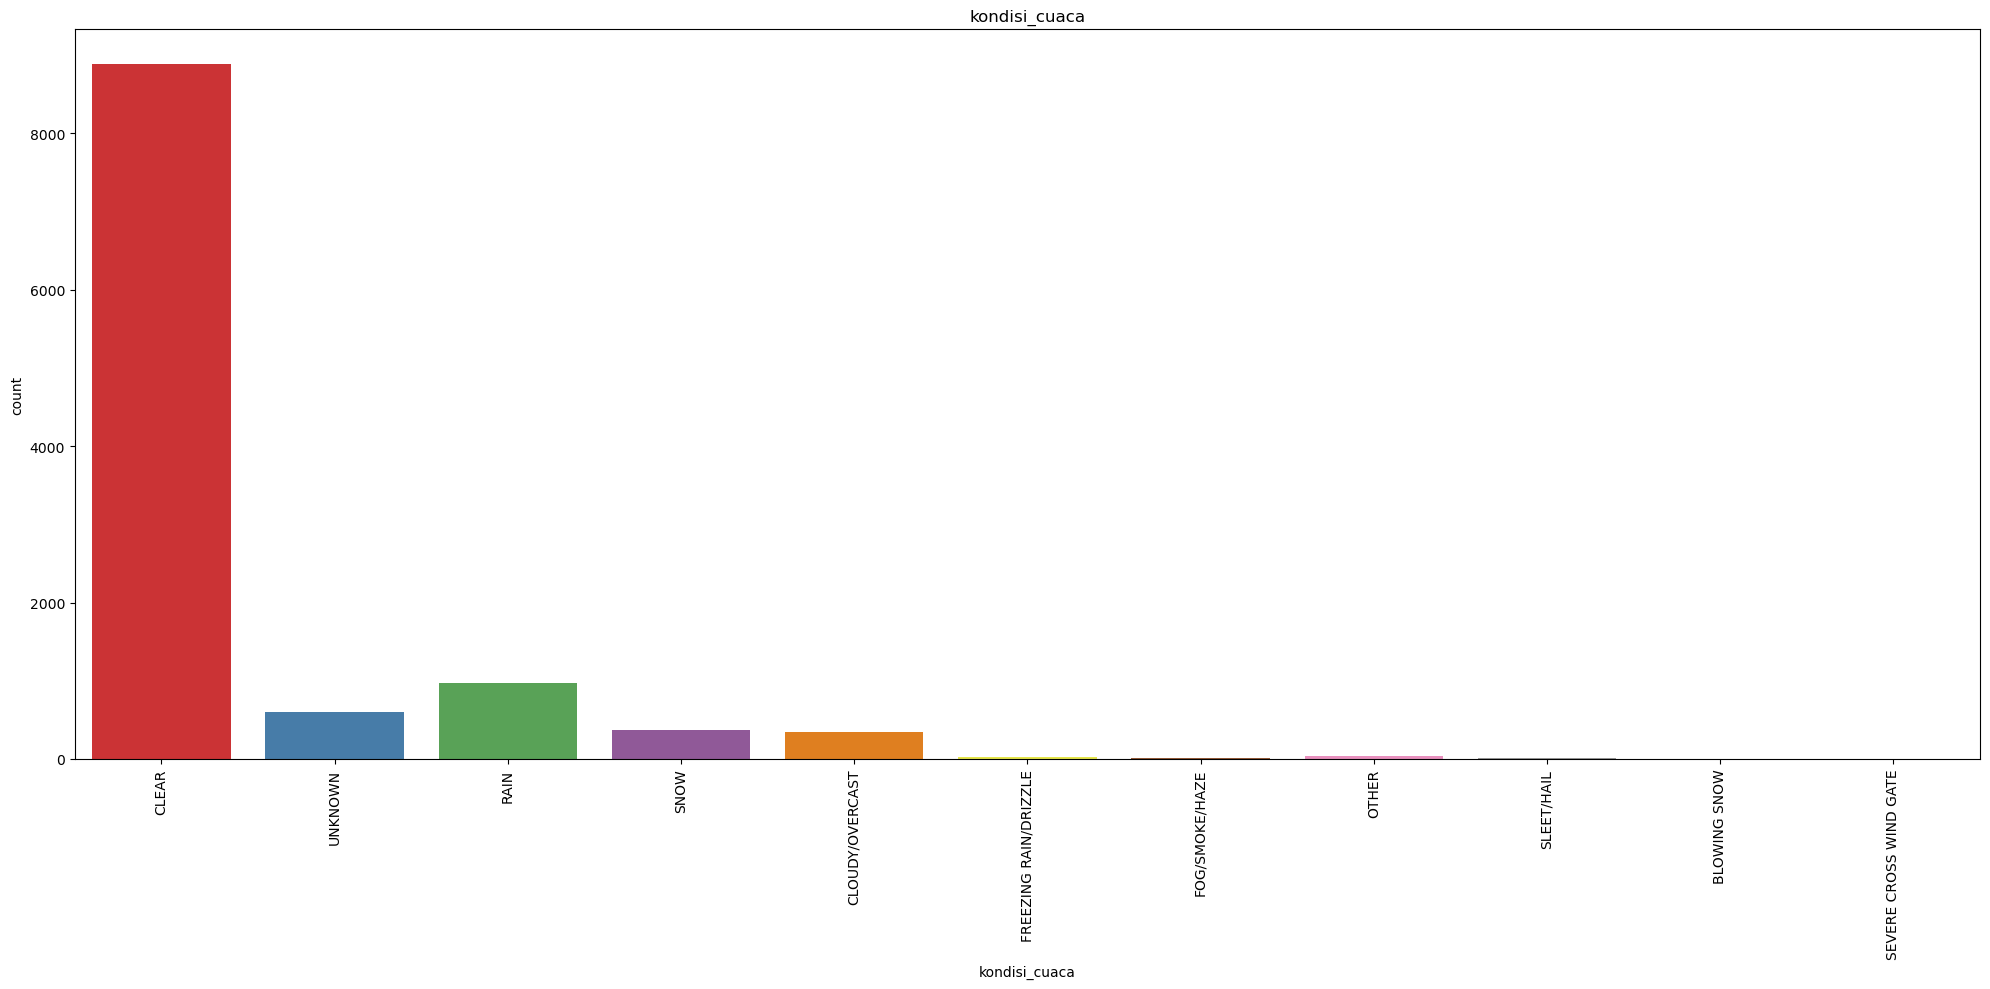

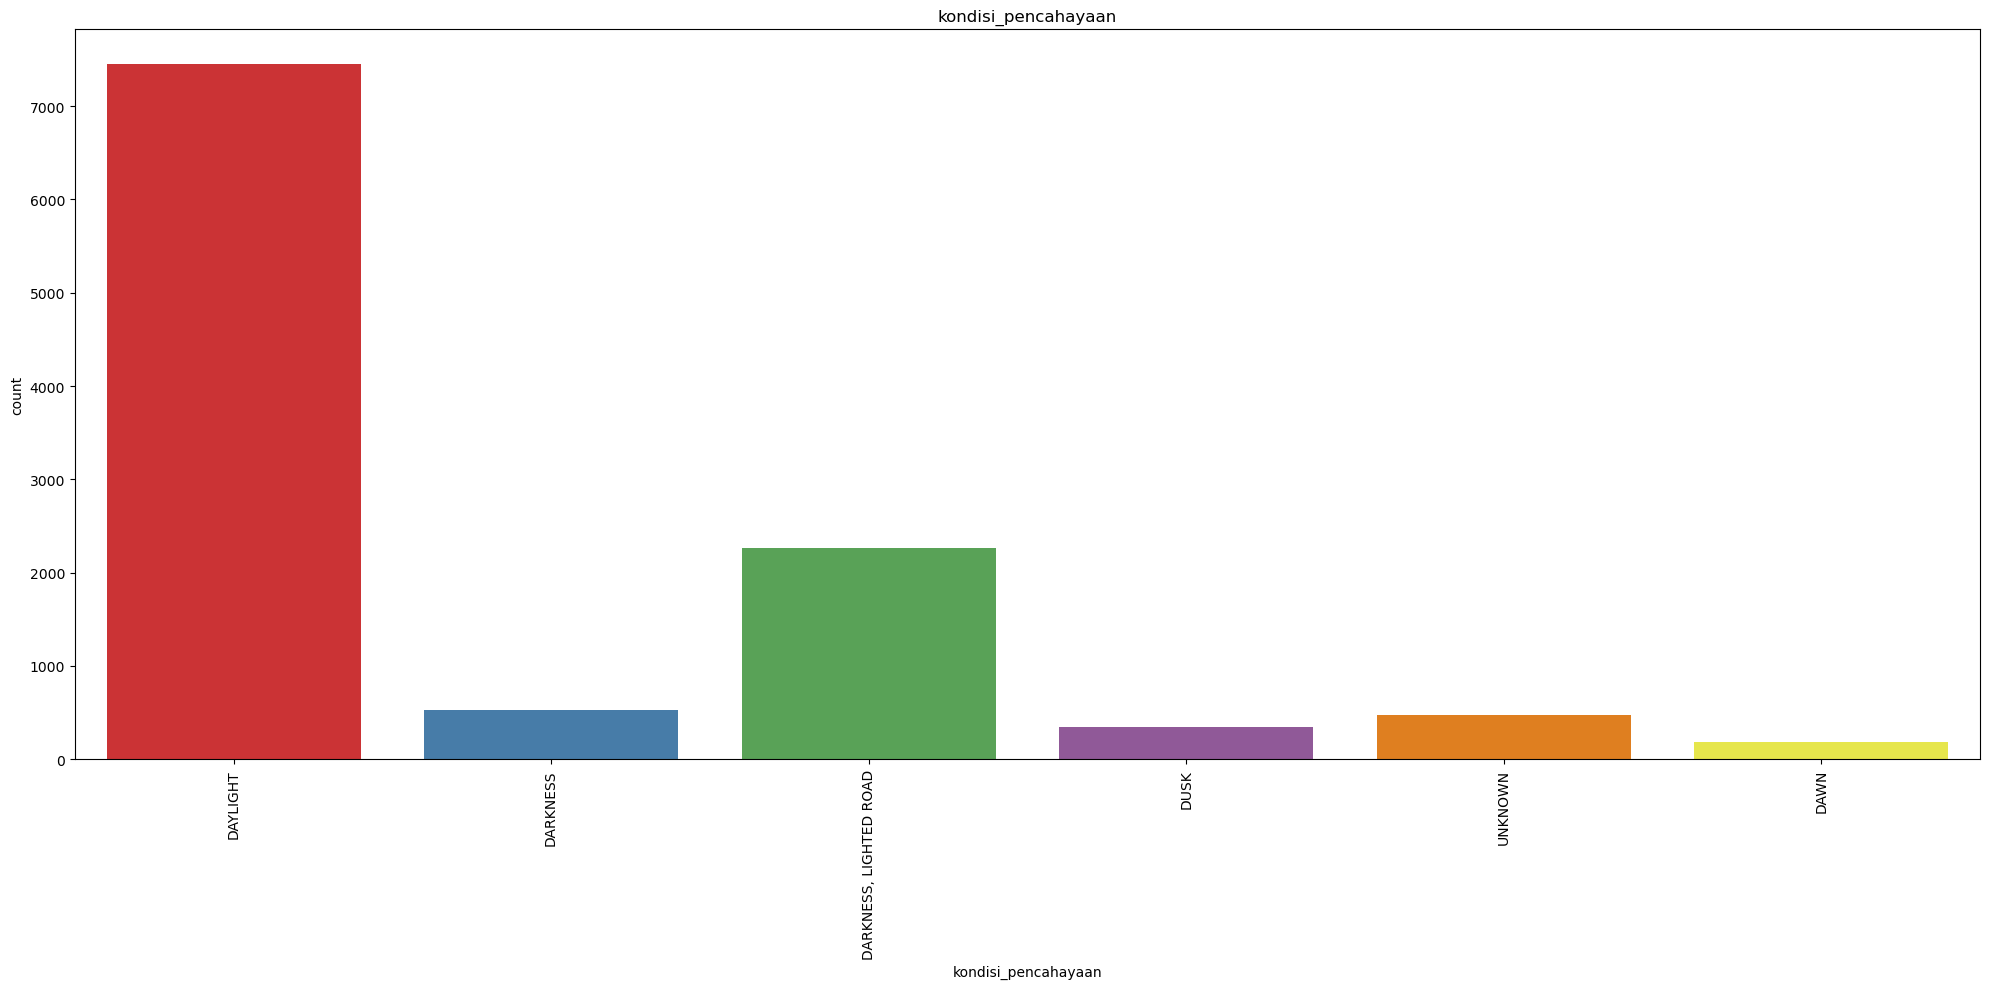

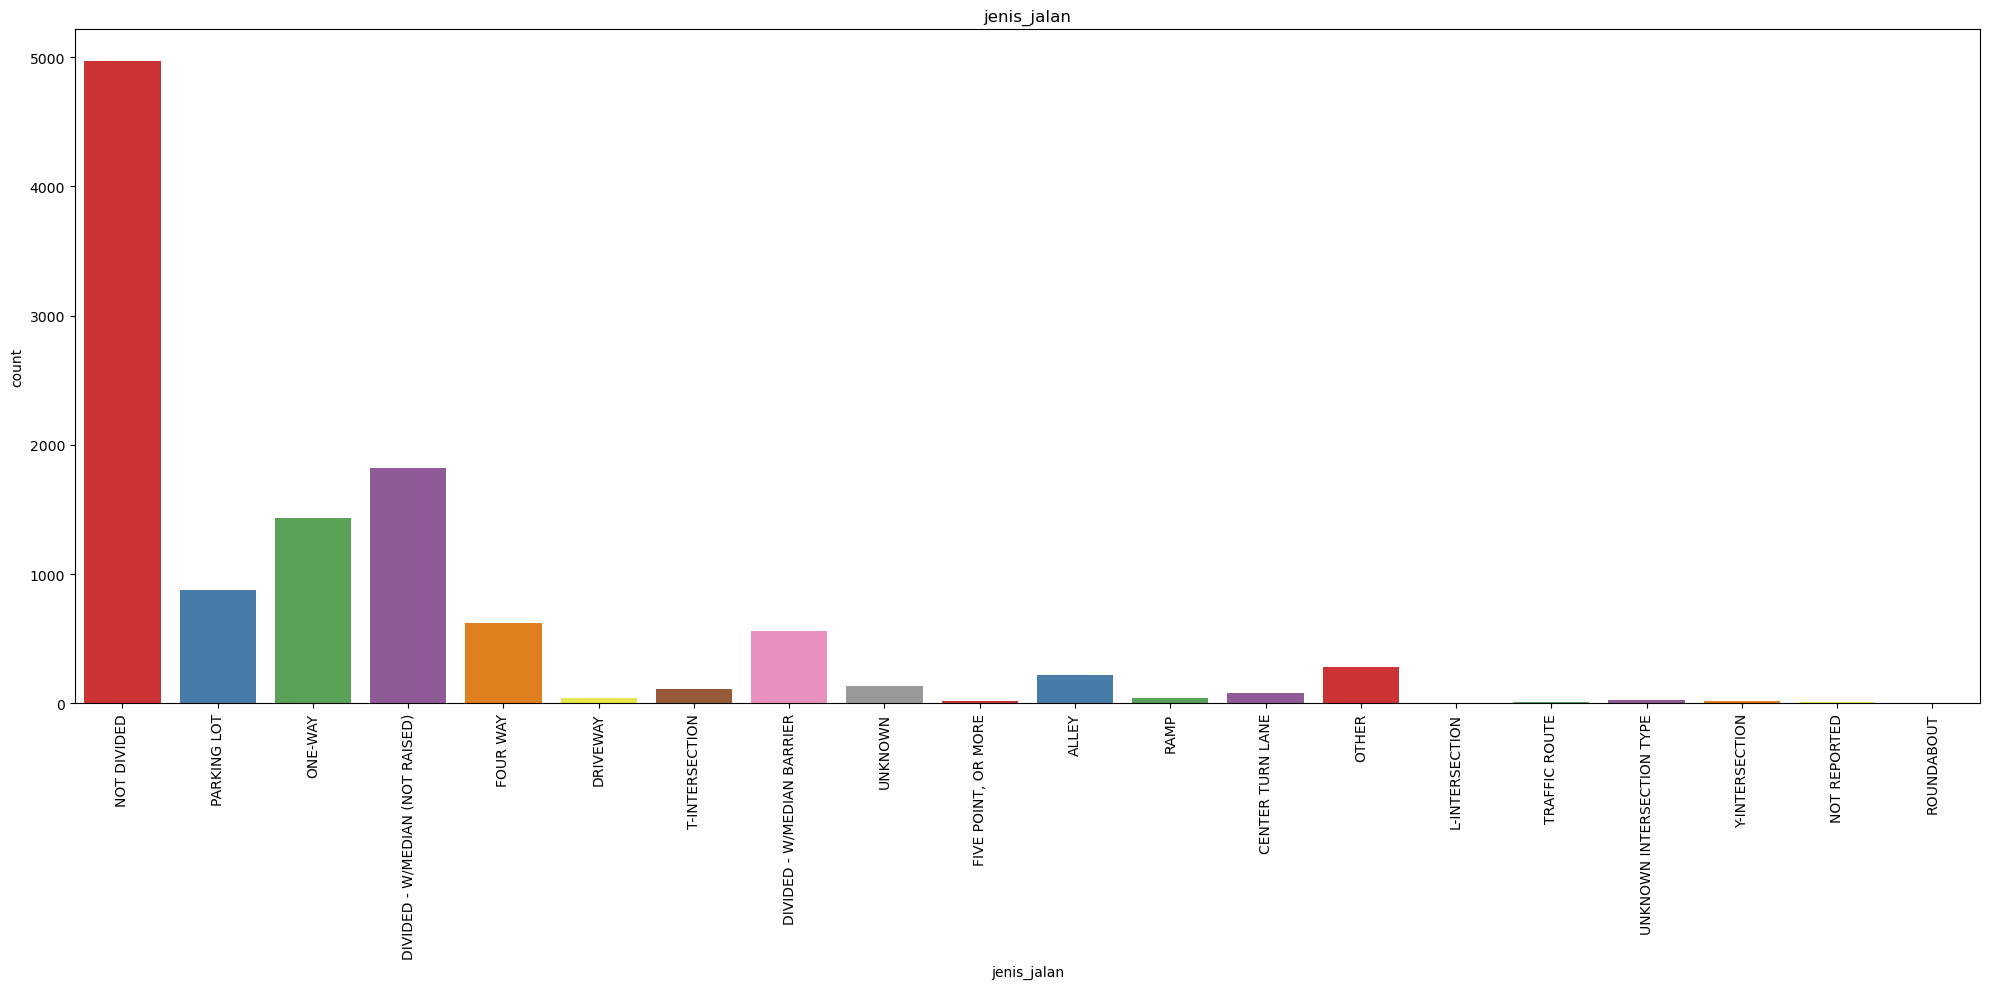

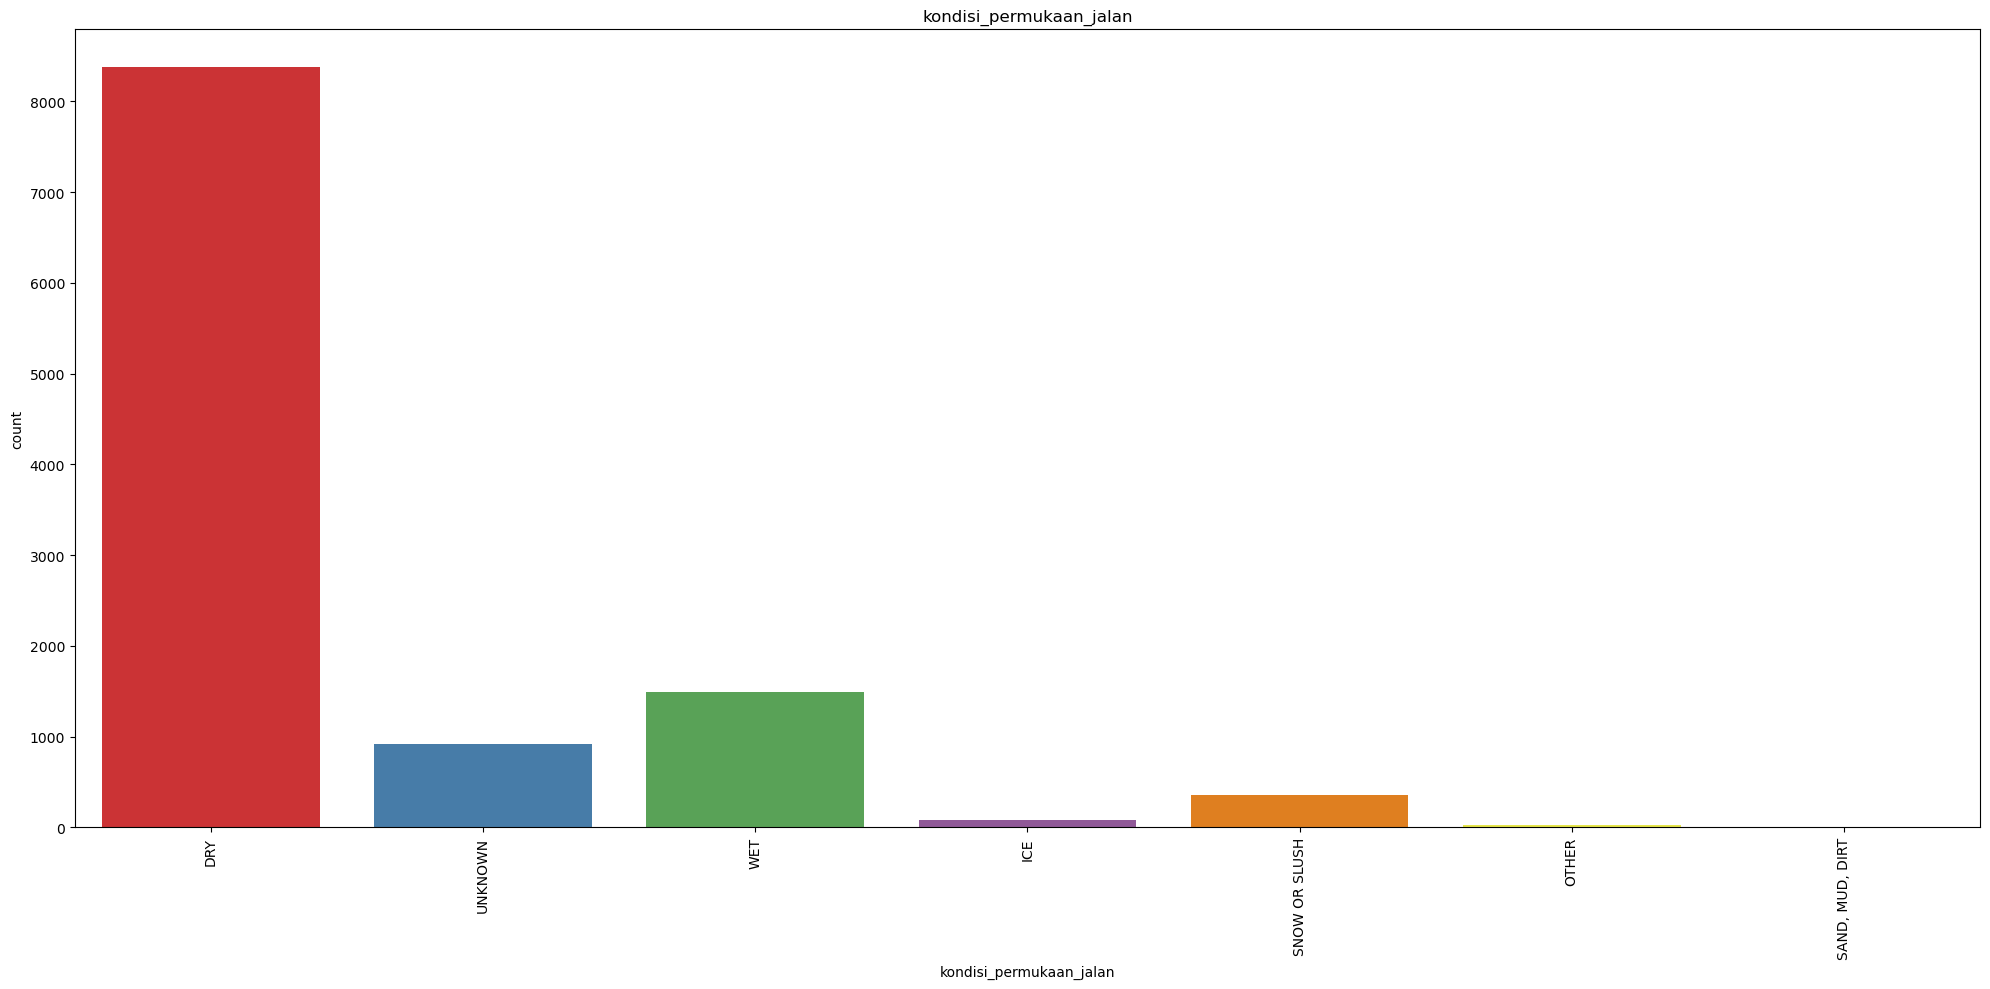

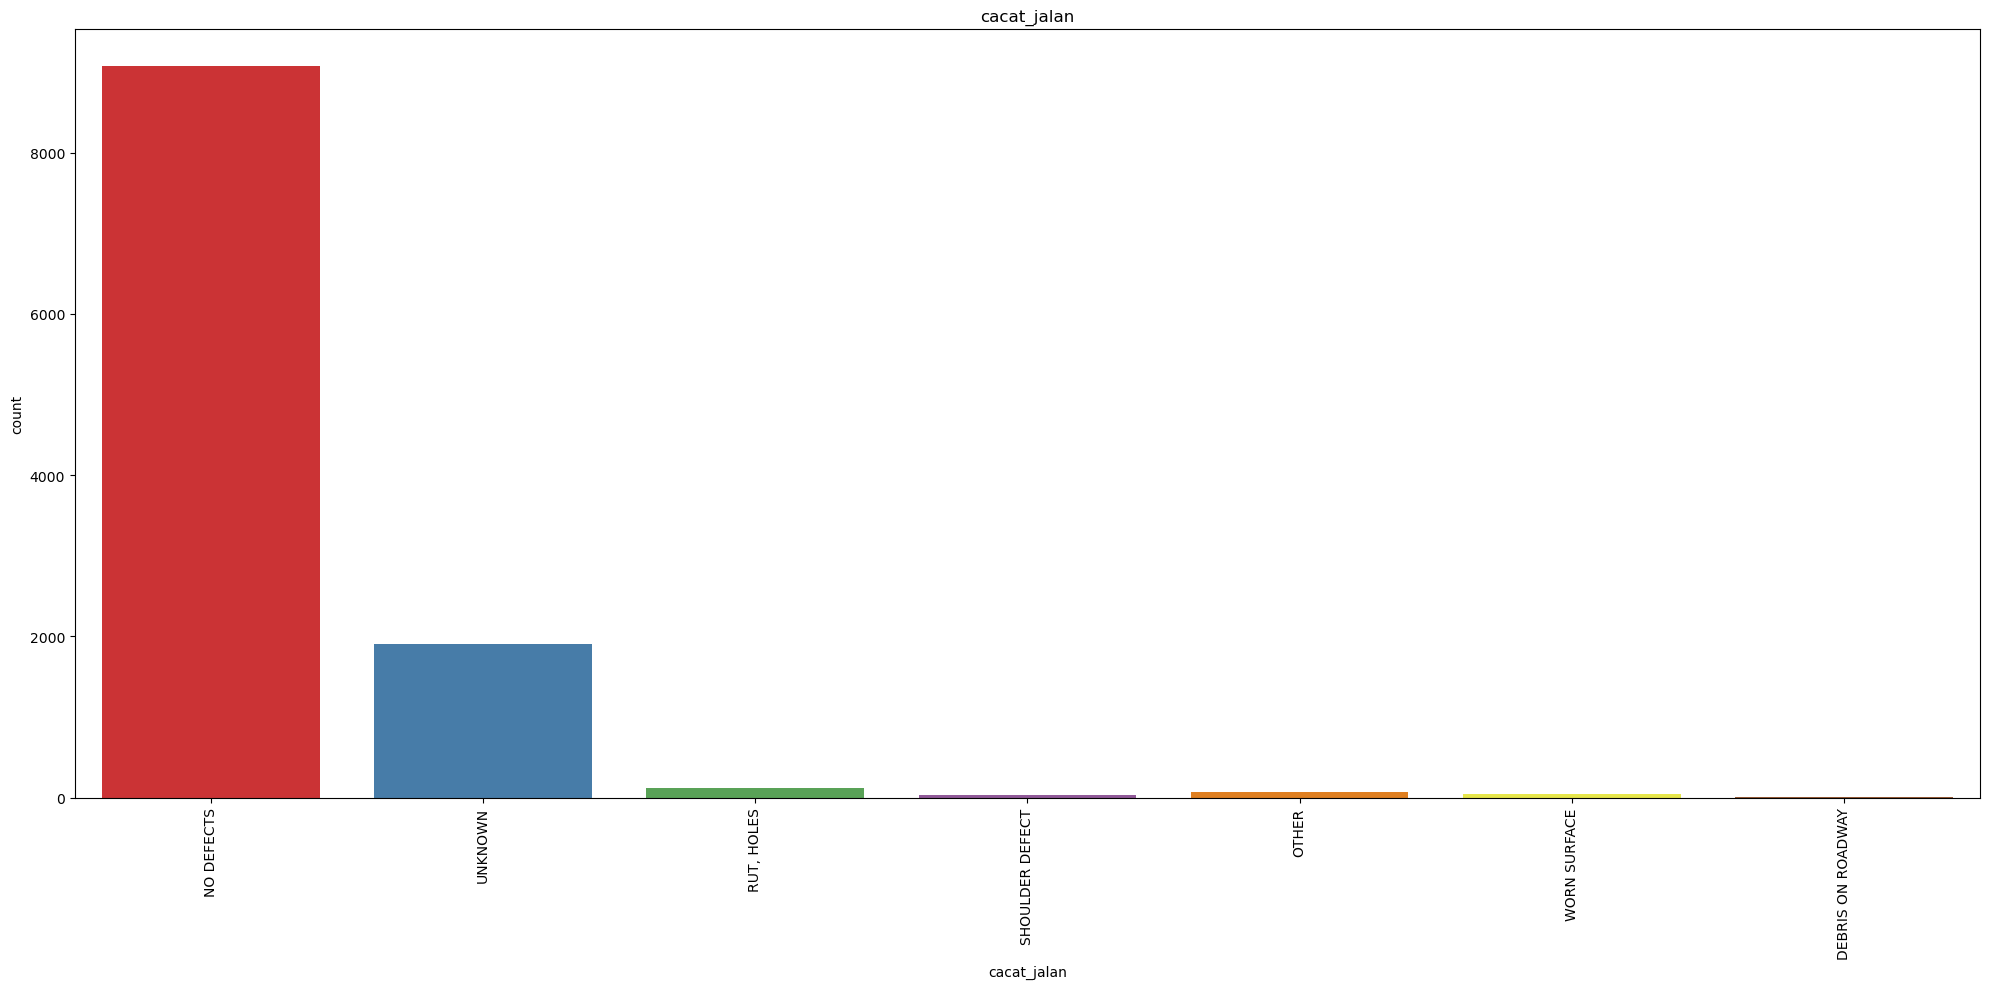

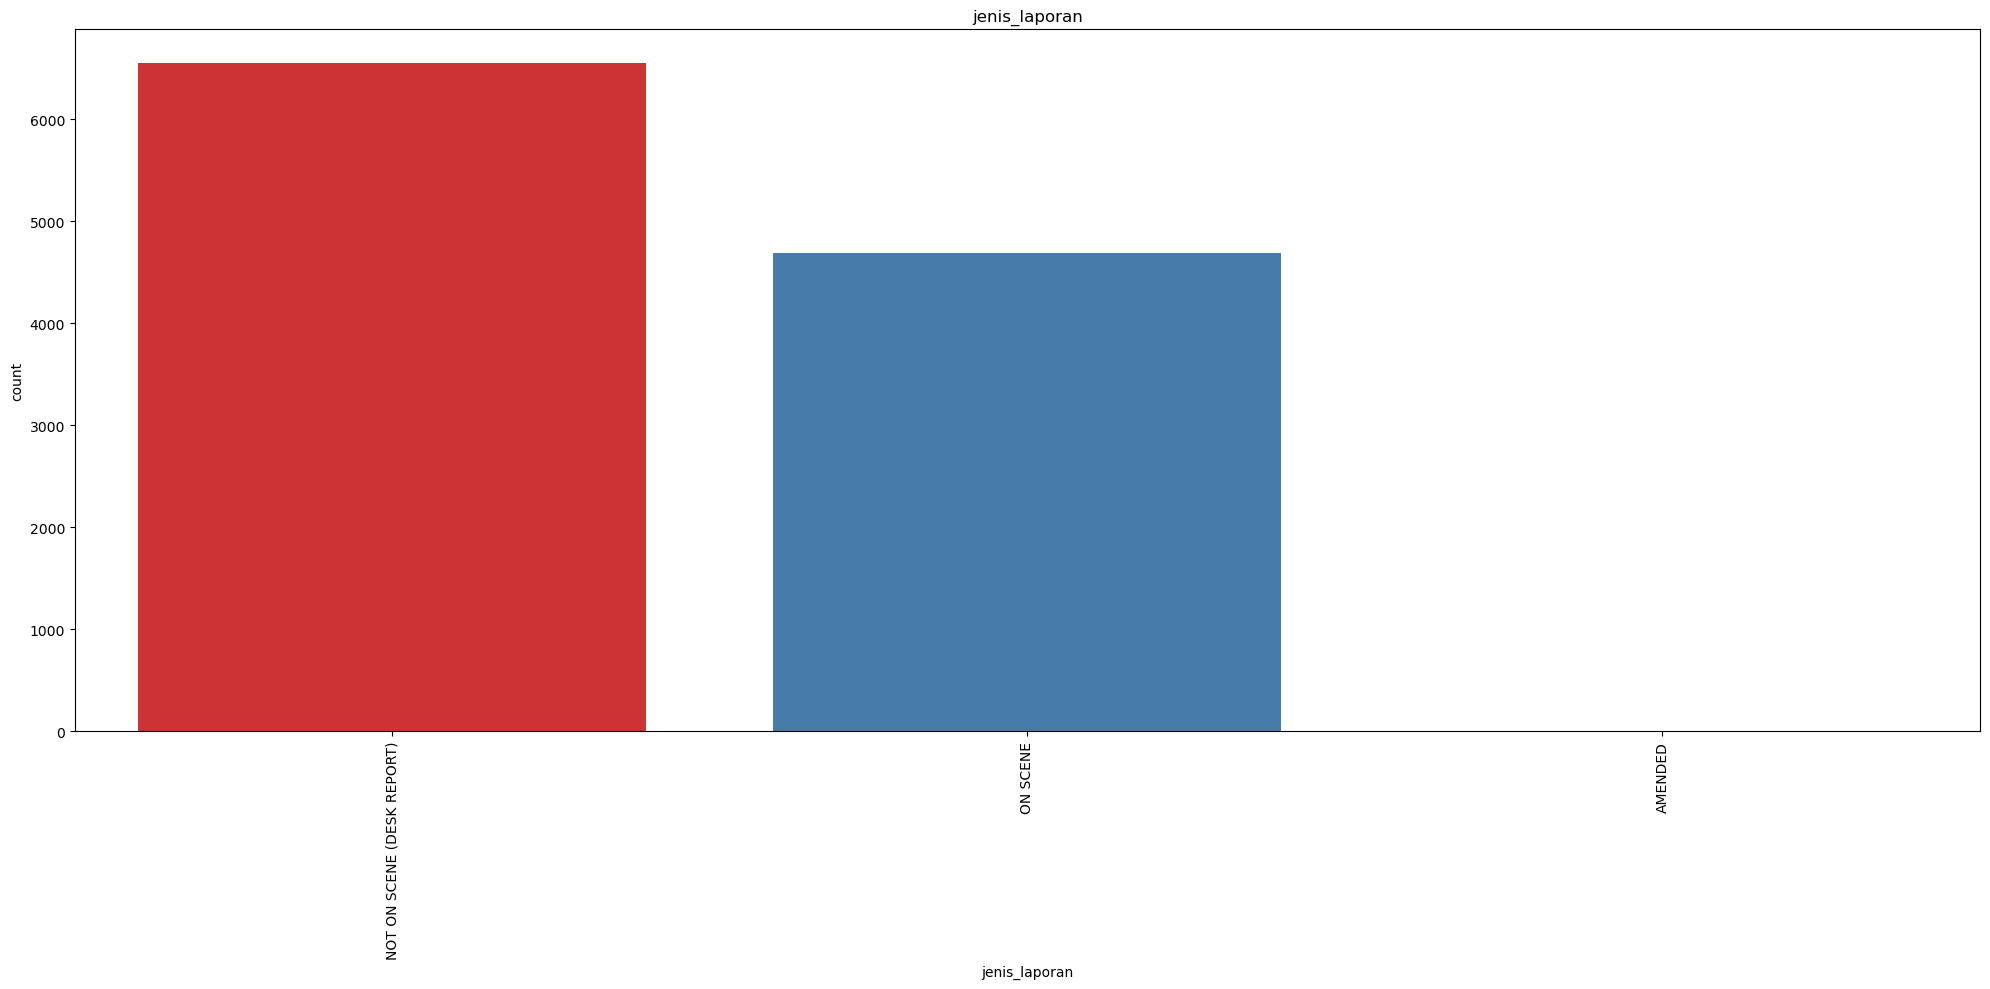

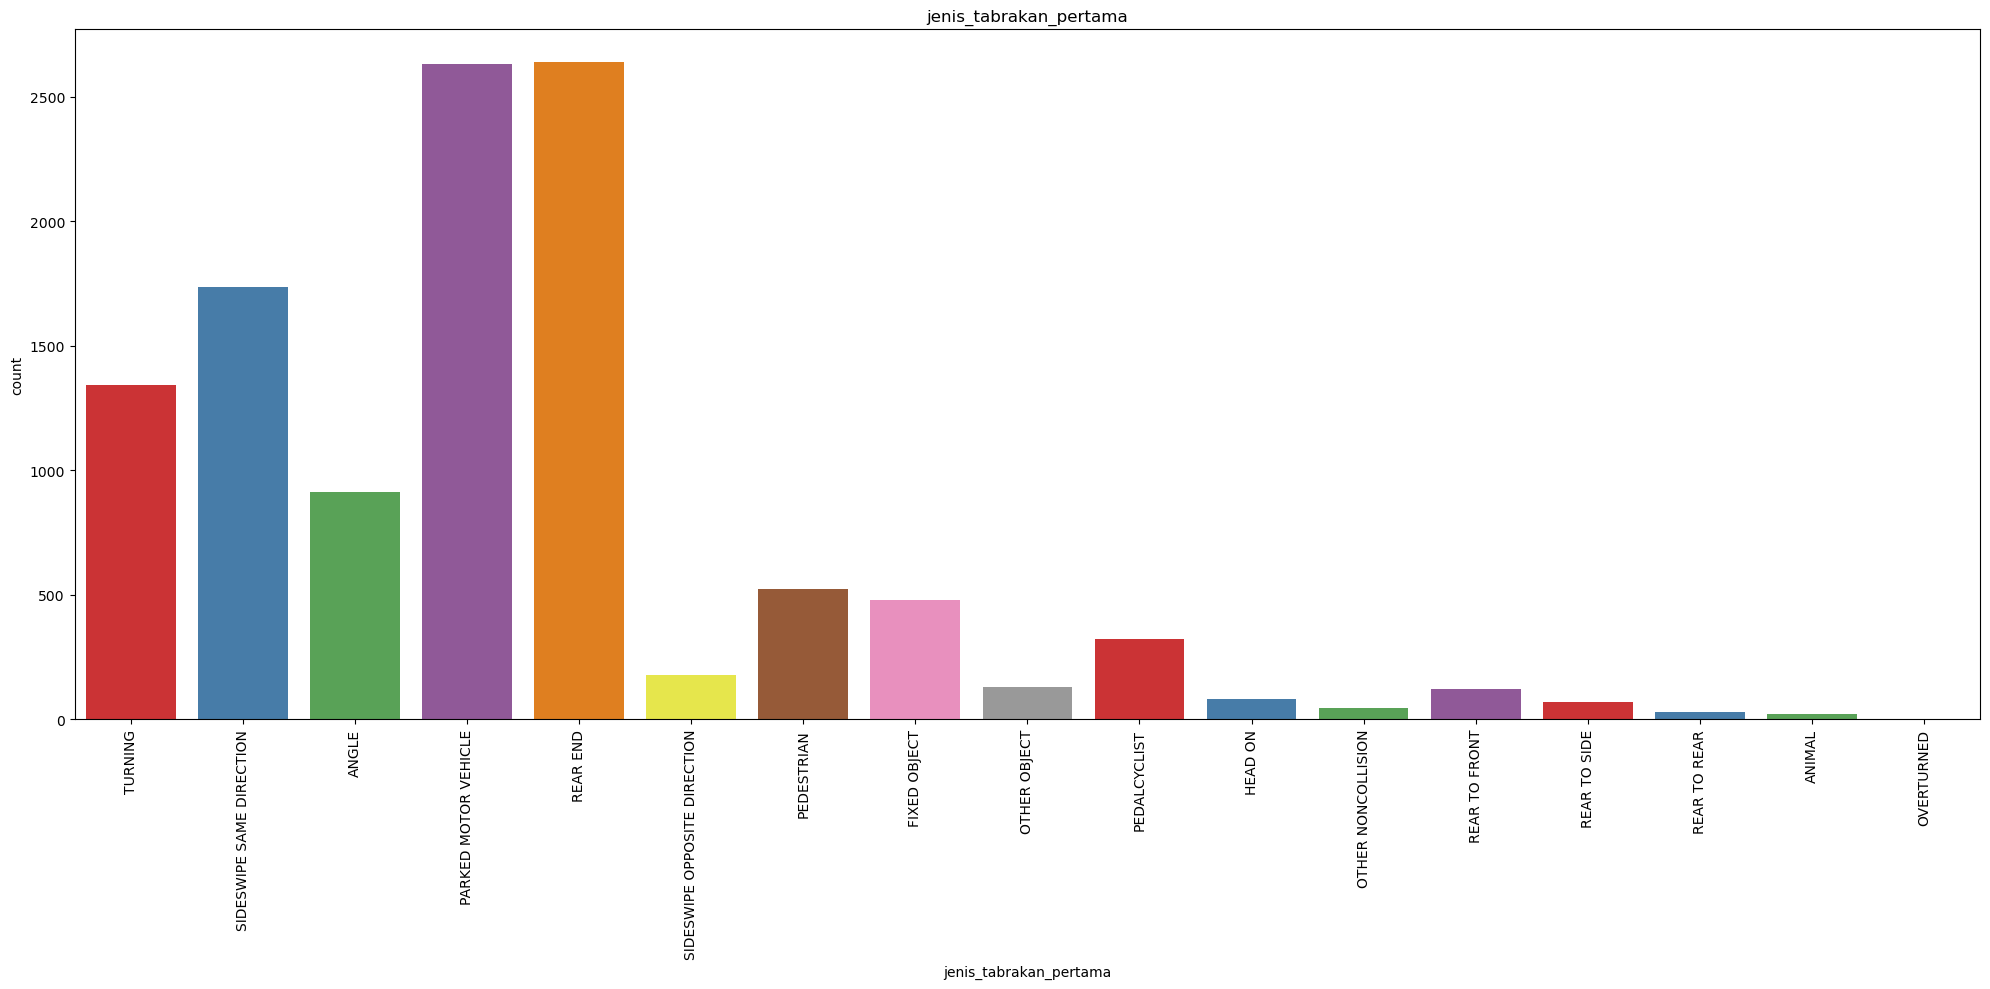

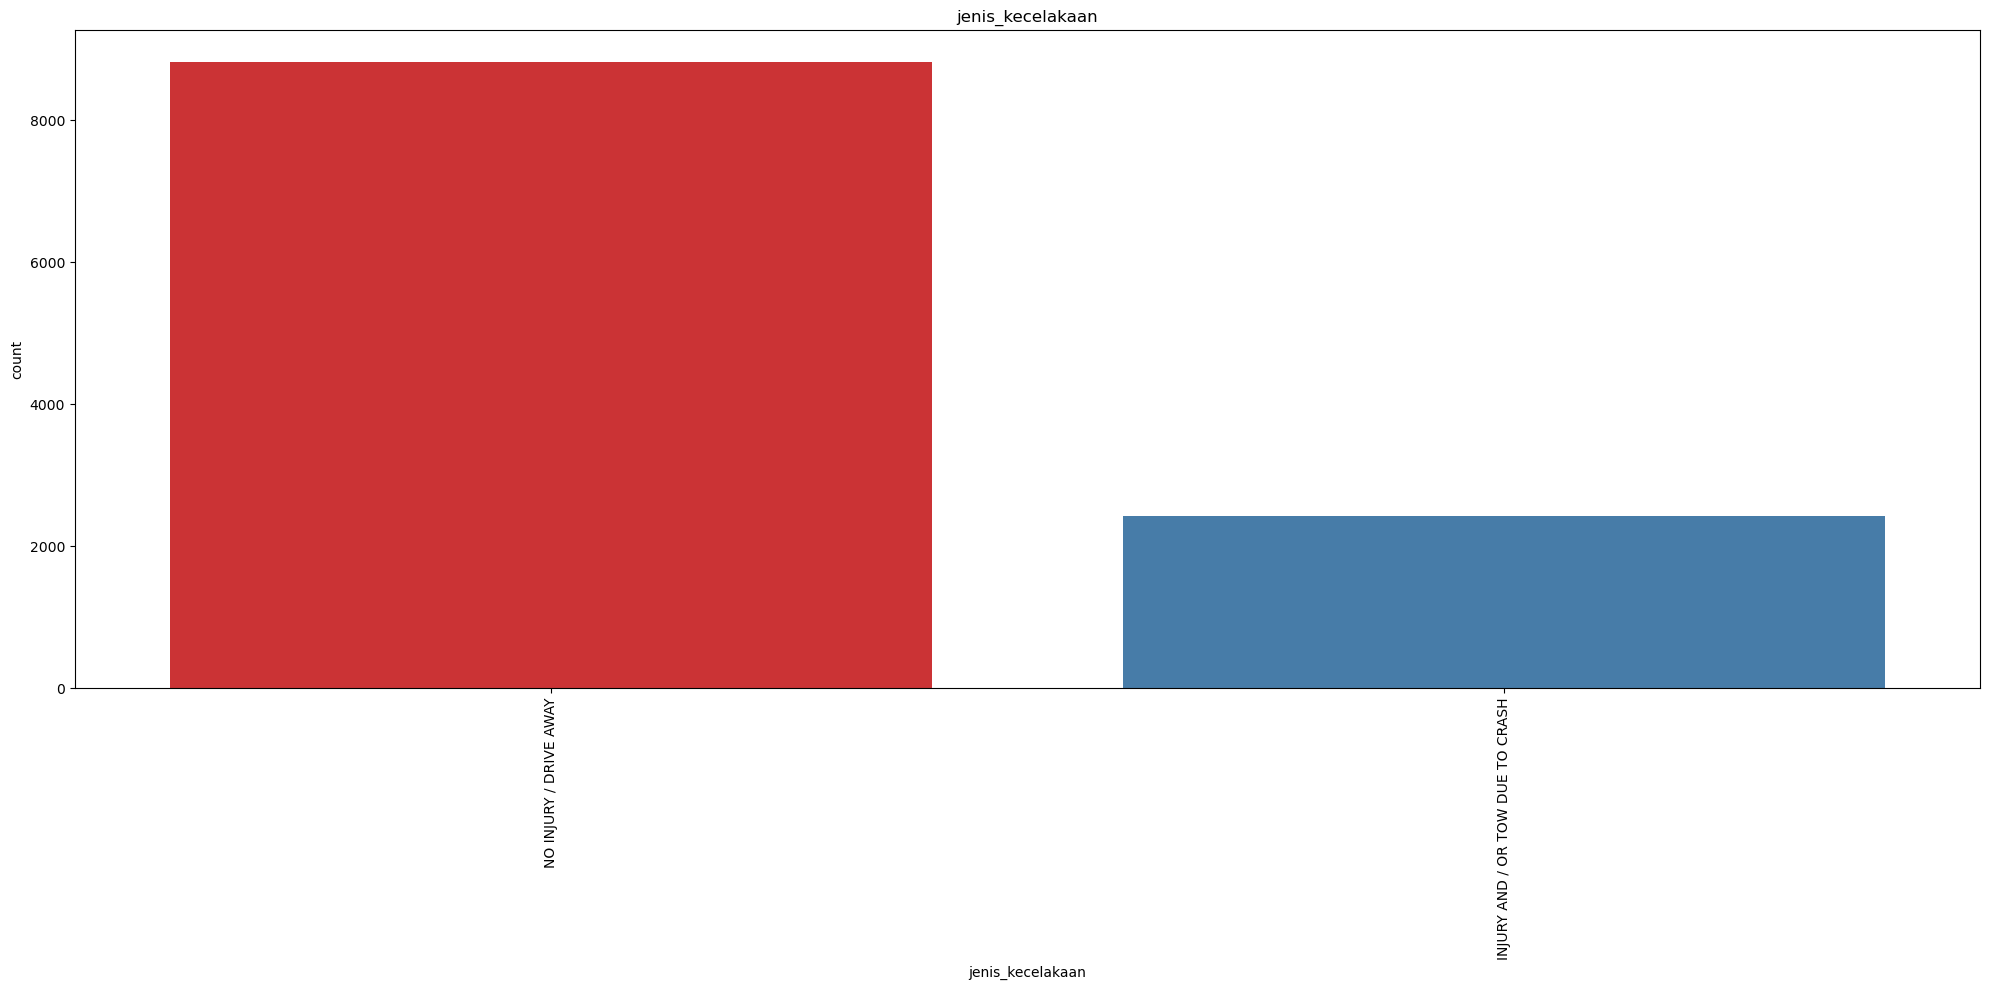

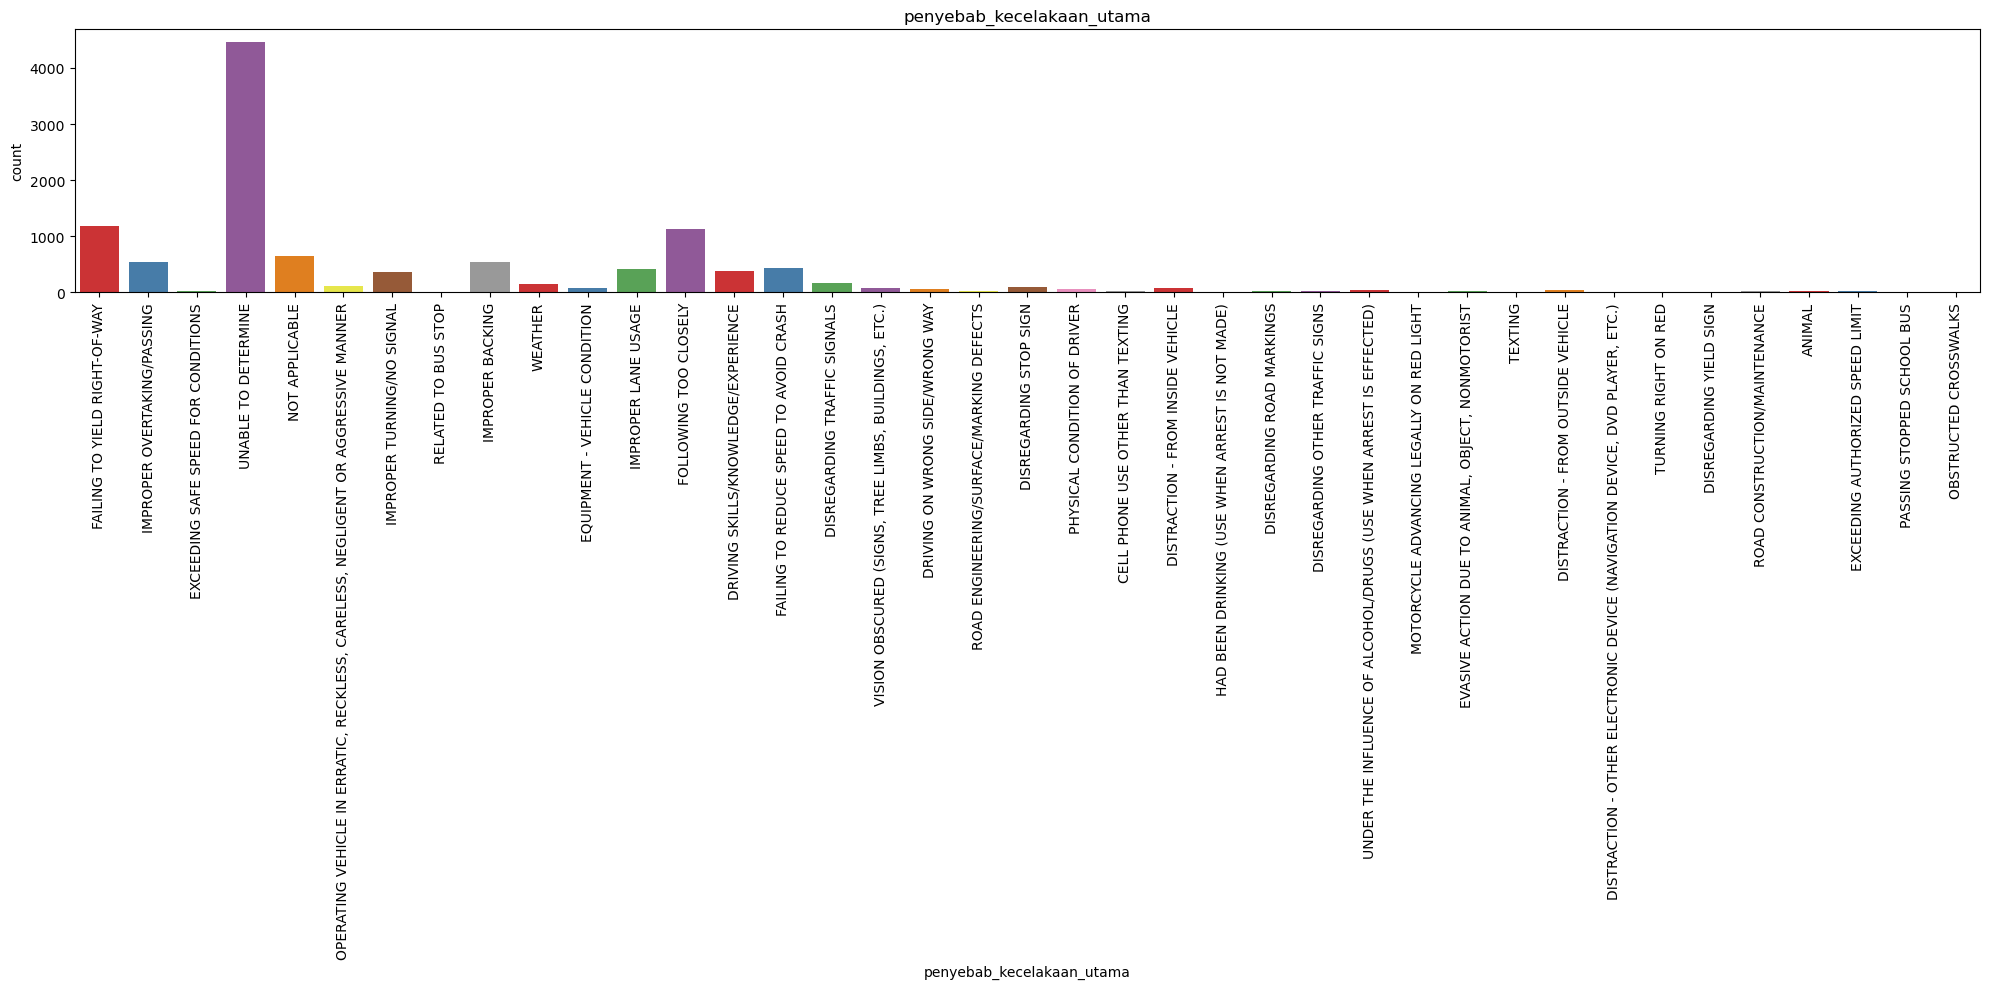

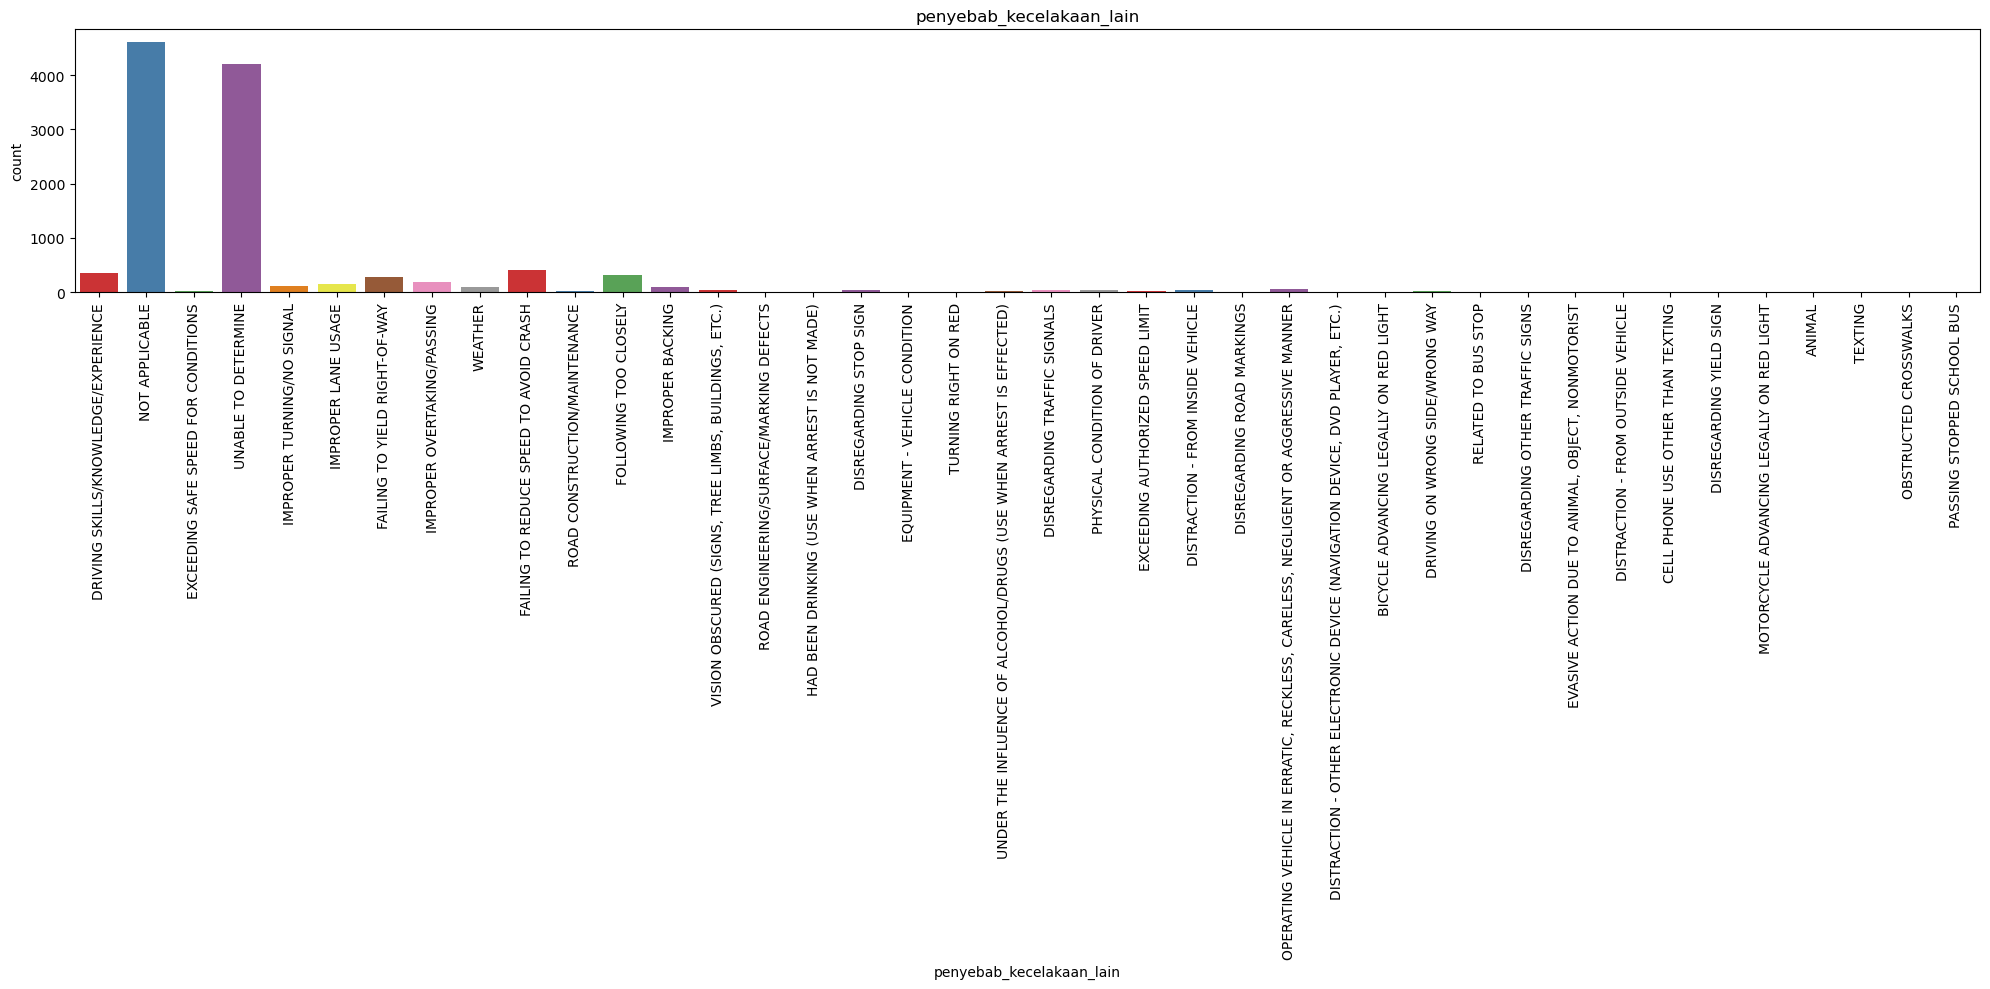

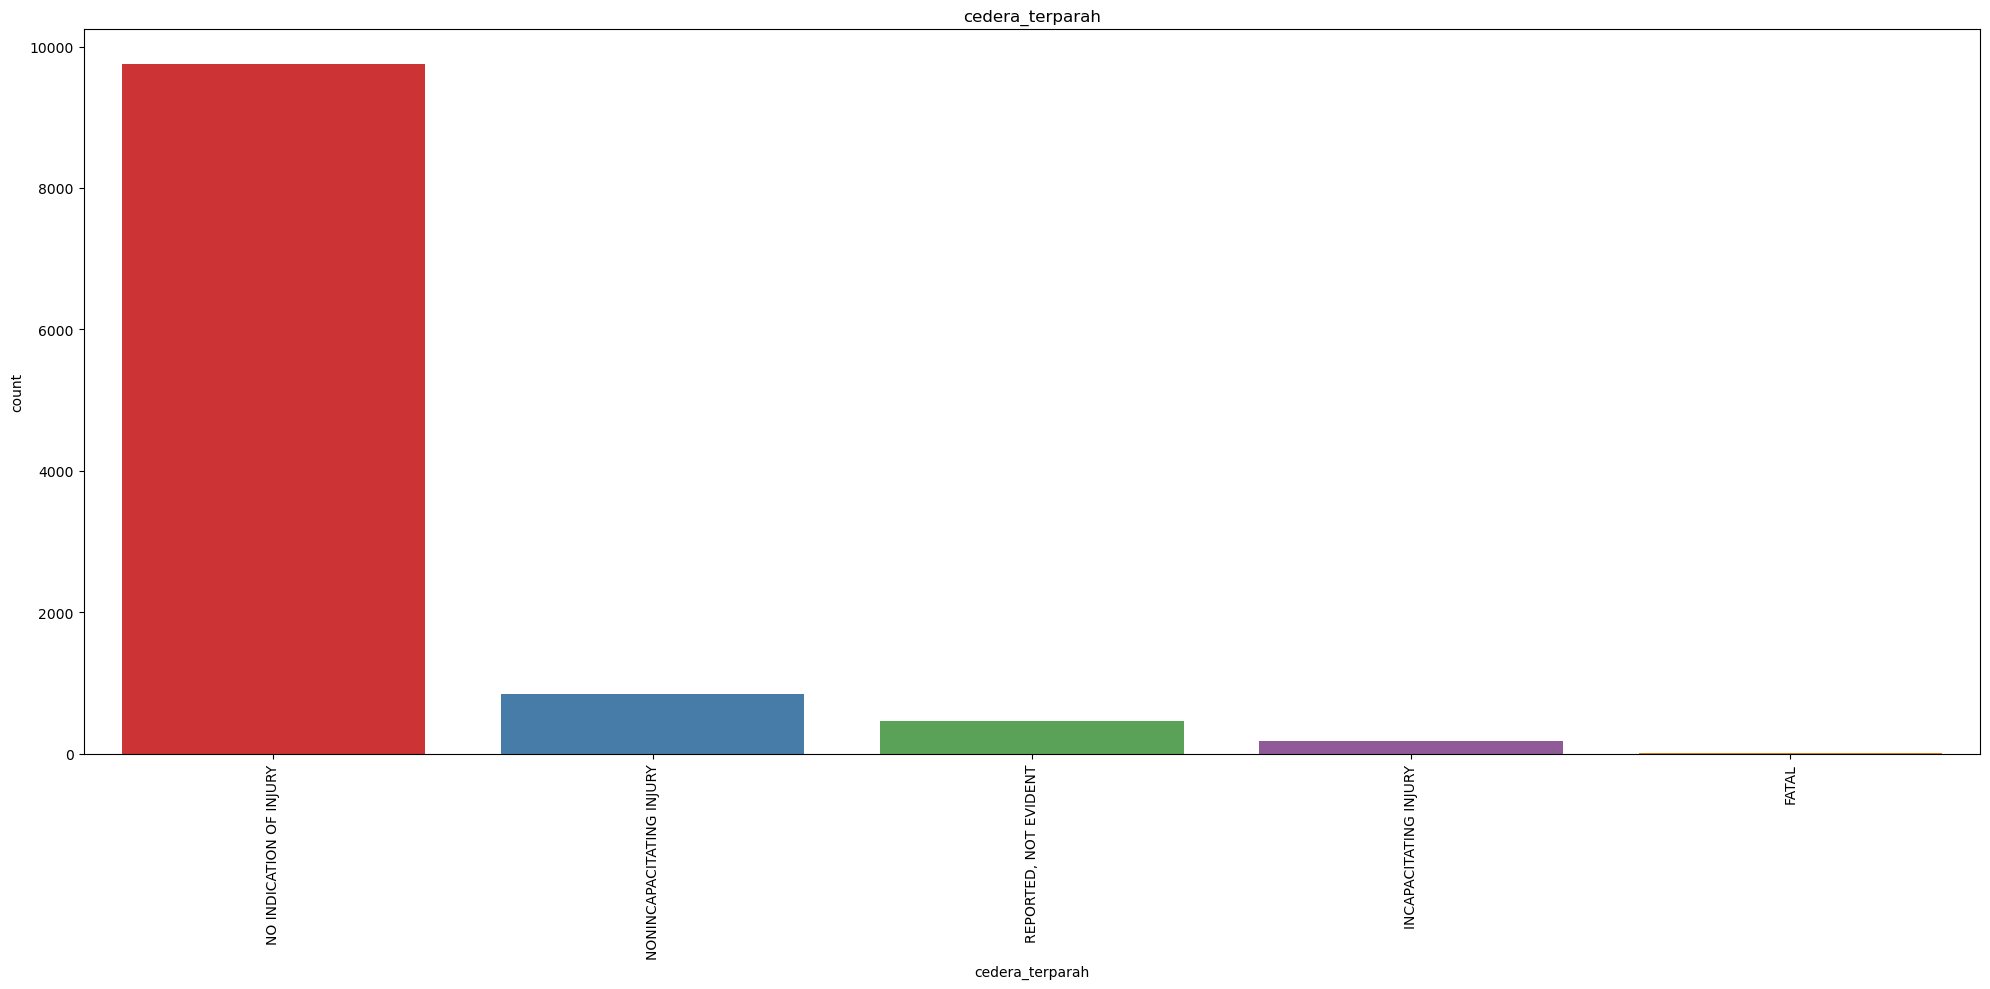

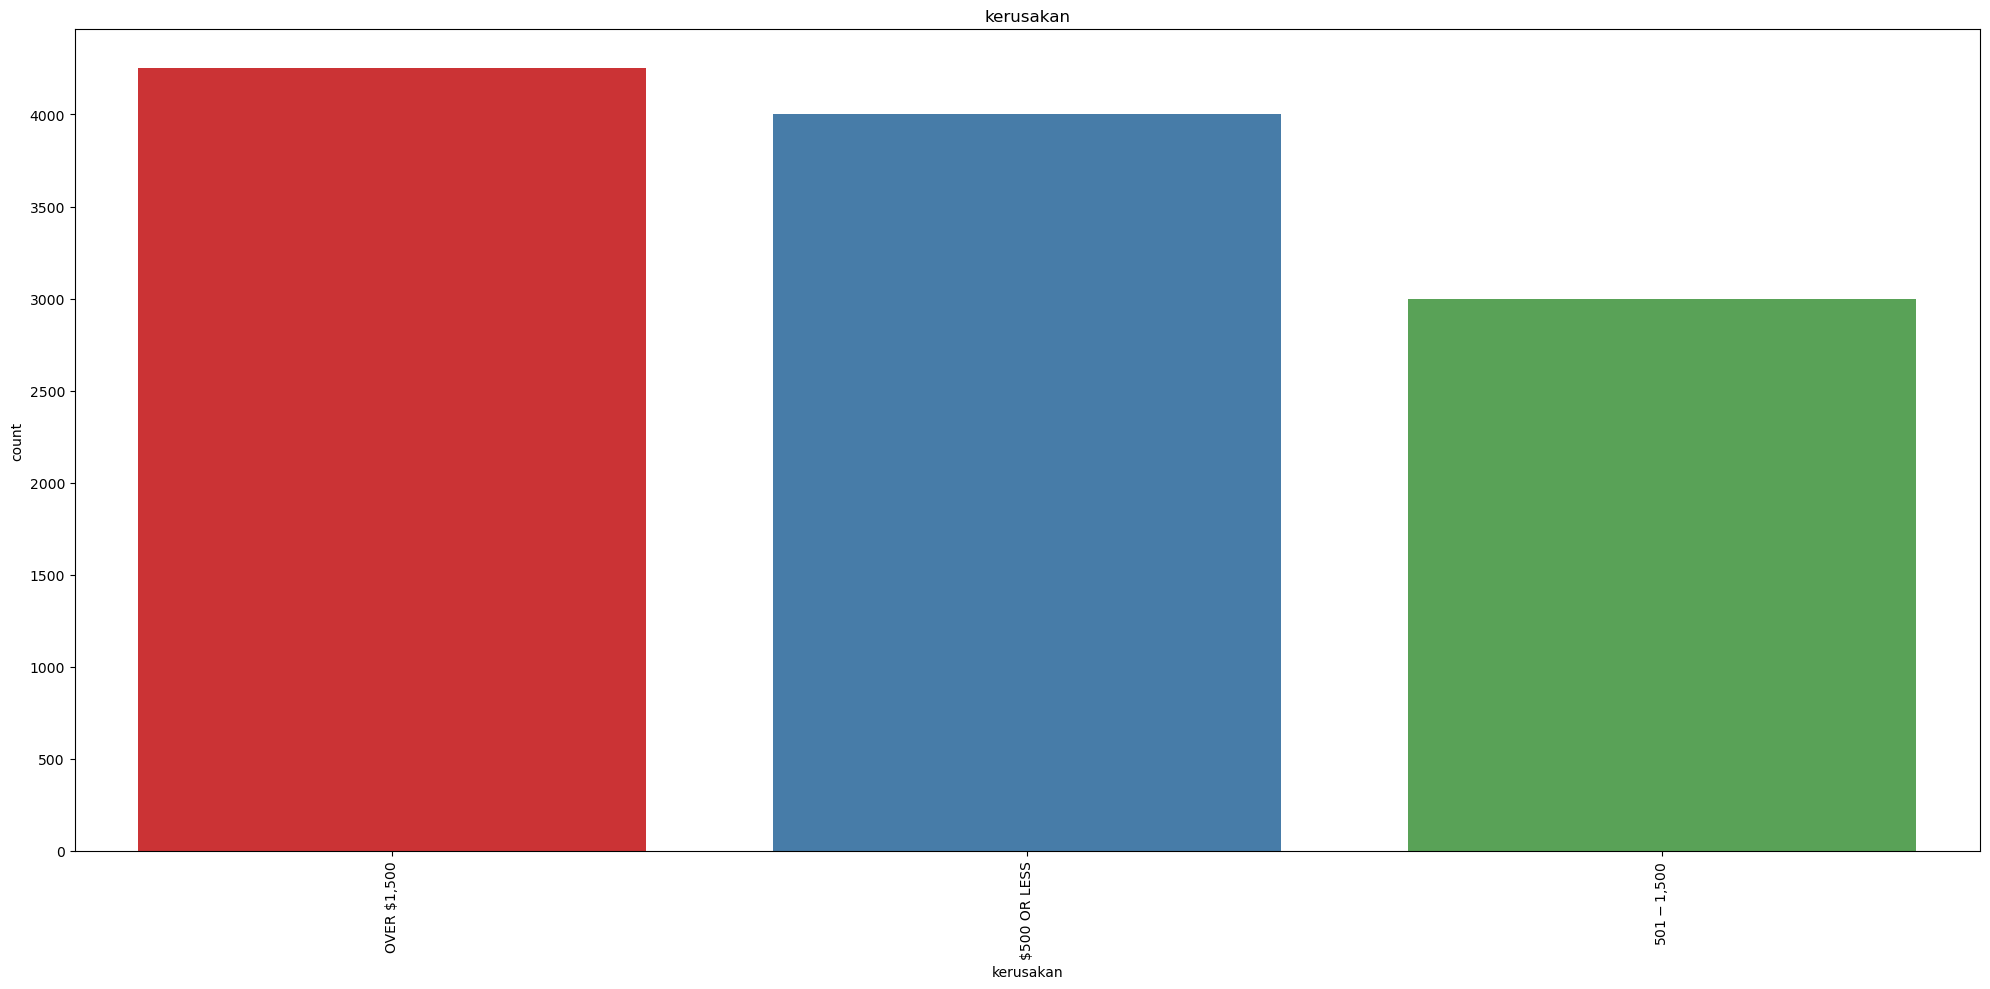

In [234]:
color_palette = sns.color_palette("Set1", len(cat_cols))
for i, column in enumerate(cat_cols, 1):
    plt.figure(figsize=(20, 10))
    sns.countplot(data=df, x=column, palette=color_palette)
    plt.xticks(rotation=90)
    plt.title(column)
    plt.tight_layout()
    plt.show()

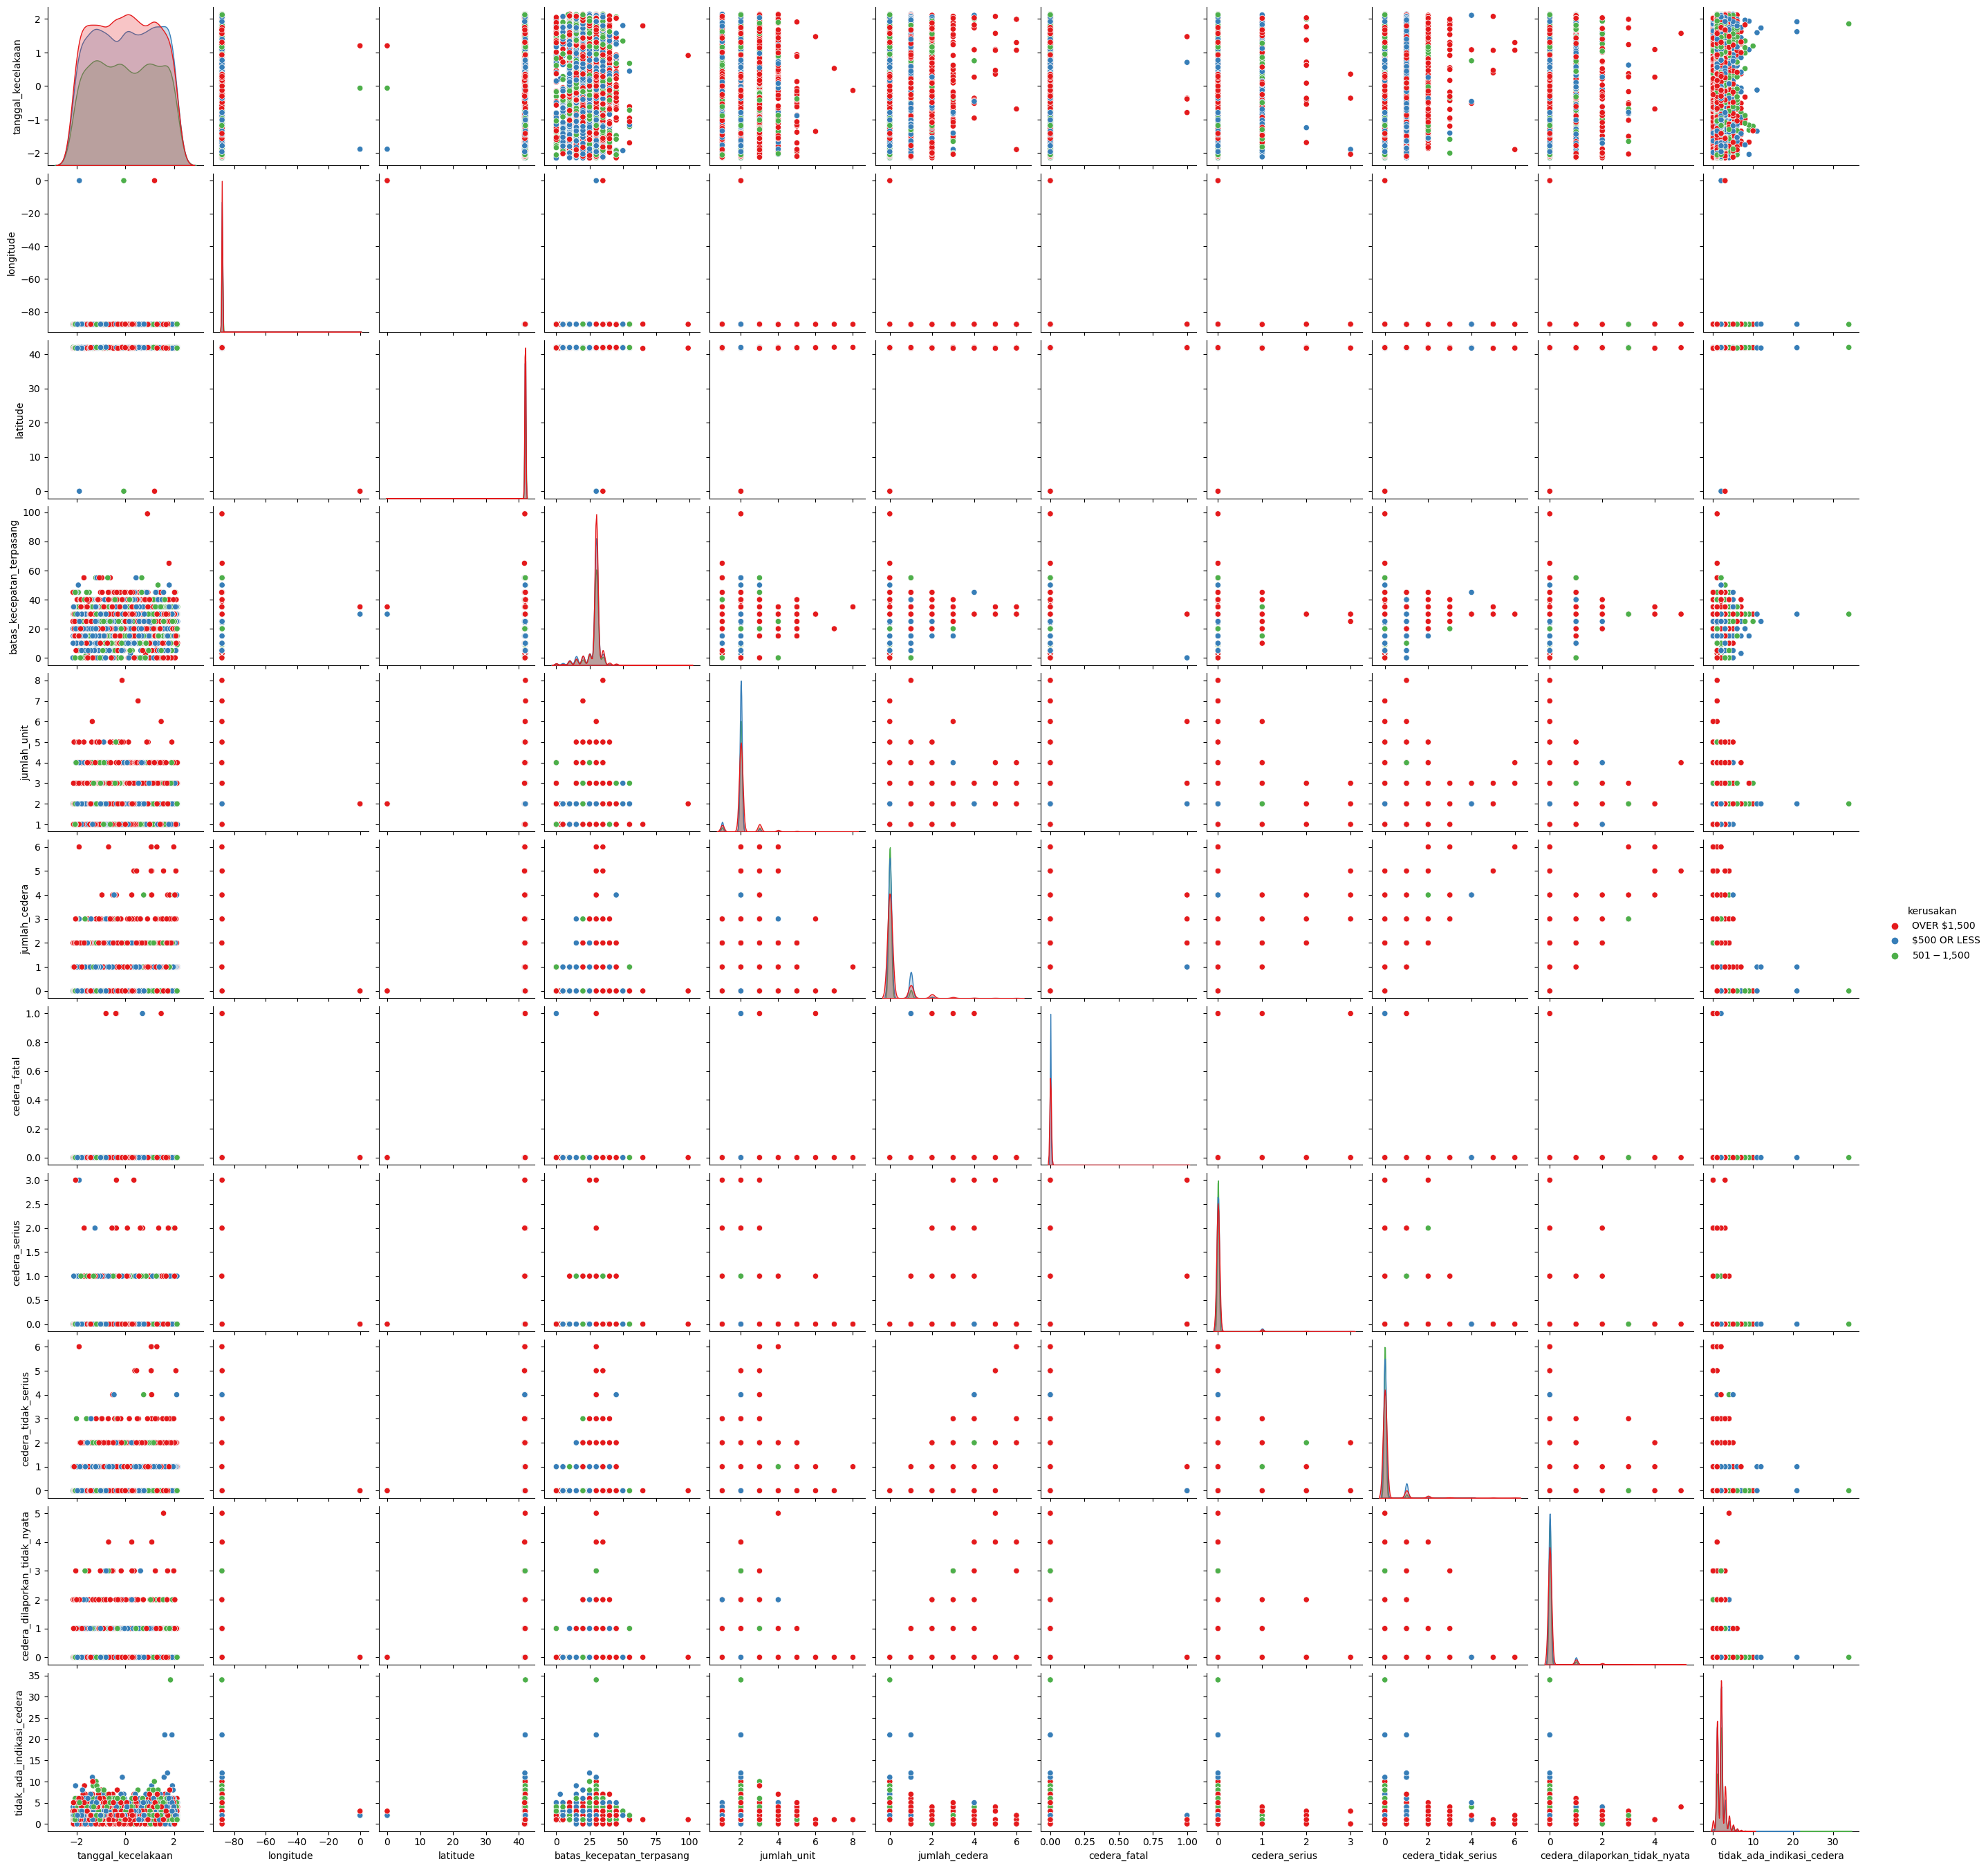

In [235]:
combined_df = pd.concat([df[num_cols], df['kerusakan']], axis=1)
sns.pairplot(combined_df, hue='kerusakan', palette='Set1')
plt.show()

In [236]:

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import optuna

In [237]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Salin DataFrame
train = df.copy()

# Pisahkan fitur dan target
X = train.drop(['kerusakan'], axis=1)
y = train['kerusakan']

# Inisialisasi LabelEncoder
le_y = LabelEncoder()

# Terapkan label encoding pada y
y_encoded = le_y.fit_transform(y)

# Tentukan random state dan kfold
random_state = 42
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Sekarang X dan y_encoded siap digunakan untuk pelatihan model

In [238]:
label_encoders = {}

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [239]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Terapkan transformasi Z-score pada X
X_scaled = scaler.fit_transform(X)

# Jika ingin hasil dalam bentuk DataFrame agar kolom tetap sama seperti X
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,tanggal_kecelakaan,longitude,latitude,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,cacat_jalan,...,jumlah_unit,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,jumlah_cedera,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera
0,0.227213,-0.048192,-0.091554,0.292989,0.355457,-0.459120,0.396917,0.189724,-0.570599,-0.476948,...,-0.028392,-0.898085,-2.205409,-0.287028,-0.341099,-0.021087,-0.122528,-0.254169,-0.195371,0.030133
1,-0.246159,-0.016782,0.109763,0.292989,0.355457,-0.459120,-2.287103,0.189724,-0.570599,-0.476948,...,-0.028392,-0.360902,-0.305899,-0.287028,-0.341099,-0.021087,-0.122528,-0.254169,-0.195371,0.030133
2,0.054839,-0.033581,0.141736,0.292989,2.594057,2.892421,-1.392429,1.323232,1.555822,2.137262,...,-0.028392,-1.112959,-1.662692,-0.287028,-0.341099,-0.021087,-0.122528,-0.254169,-0.195371,0.030133
3,1.320002,-0.004088,-0.220670,1.091355,0.355457,-0.459120,0.396917,0.189724,-0.570599,-0.476948,...,-0.028392,1.035776,1.050893,-0.287028,-0.341099,-0.021087,-0.122528,-0.254169,-0.195371,0.030133
4,1.071461,-0.084317,0.177647,-1.303741,0.355457,-0.459120,0.396917,0.756478,-0.570599,-0.476948,...,-0.028392,1.035776,1.050893,-0.287028,-0.341099,-0.021087,-0.122528,-0.254169,-0.195371,-0.857300


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_encoded, test_size=0.2, 
                                                    stratify=y_encoded, random_state=random_state)

In [241]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Inisialisasi model
classifiers = []
classifiers.append(KNeighborsClassifier(n_neighbors=5))
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='error'))

# Evaluasi model menggunakan F1 score
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring="f1_weighted", cv=kfold, n_jobs=4))

# Menghitung rata-rata dan deviasi standar dari hasil cross-validation
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# Membuat DataFrame untuk hasil
cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValerrors": cv_std,
    "Algorithm": ["KNN", "GaussianNB", "Decision Tree", "Random Forest", "XGBoost"]
})

# Mengurutkan berdasarkan nilai rata-rata F1 score
cv_res = cv_res.sort_values(by='CrossValMeans', ascending=False)

# Menampilkan hasil
print(cv_res)


   CrossValMeans  CrossValerrors      Algorithm
3       0.489925        0.009727  Random Forest
4       0.486423        0.005809        XGBoost
2       0.420977        0.009449  Decision Tree
1       0.228211        0.017980     GaussianNB
0            NaN             NaN            KNN


In [242]:
for i, classifier in enumerate(classifiers):
    print(f"F1 Scores for {cv_res['Algorithm'][i]}: {cv_results[i]}")

F1 Scores for KNN: [nan nan nan nan nan]
F1 Scores for GaussianNB: [0.21547859 0.2176327  0.22190546 0.22223403 0.26380576]
F1 Scores for Decision Tree: [0.41260695 0.4086831  0.42164549 0.42745129 0.43449917]
F1 Scores for Random Forest: [0.49731134 0.49223033 0.49665659 0.47091871 0.49251013]
F1 Scores for XGBoost: [0.48514984 0.48702176 0.4764564  0.49406895 0.48941925]


In [243]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=random_state
    )
    
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

In [244]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-09-29 21:09:49,030] A new study created in memory with name: no-name-0321f2f6-2d37-44fa-82b6-f26f3123c1a1
[I 2024-09-29 21:09:54,920] Trial 0 finished with value: 0.5006666666666666 and parameters: {'n_estimators': 123, 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5006666666666666.
[I 2024-09-29 21:09:59,428] Trial 1 finished with value: 0.5066666666666666 and parameters: {'n_estimators': 62, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.5066666666666666.
[I 2024-09-29 21:10:05,791] Trial 2 finished with value: 0.5097777777777779 and parameters: {'n_estimators': 117, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5097777777777779.
[I 2024-09-29 21:10:11,247] Trial 3 finished with value: 0.46799999999999997 and parameters: {'n_estimators': 235, 'max_depth': 3,

In [245]:
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 170, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2'}


In [246]:
clf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=random_state,
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('Val Accuracy:', score)

Val Accuracy: 0.4951111111111111


In [247]:
test = pd.read_csv('Praktikum_2_ML(test).csv')
test_df = test.drop('crash_record_id', axis=1)
test_df['tanggal_kecelakaan'] = pd.to_datetime(df['tanggal_kecelakaan'])
test_df['tanggal_kecelakaan'] = test_df['tanggal_kecelakaan'].values.astype(int)
test_df['tanggal_kecelakaan'] = test_df['tanggal_kecelakaan'].div(10**9)
for col, le in label_encoders.items():
    test_df[col] = le.transform(test_df[col].astype(str))
scaler = StandardScaler()
# Fit dan transform test_df
test_df_scaled = pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns)

In [248]:
pred = clf.predict(test_df_scaled)
pred

array([0, 1, 1, ..., 0, 2, 2])

In [249]:
decoded_predictions = le_y.inverse_transform(pred)

# Menampilkan hasil prediksi yang sudah didecode
decoded_predictions

array(['$500 OR LESS', '$501 - $1,500', '$501 - $1,500', ...,
       '$500 OR LESS', 'OVER $1,500', 'OVER $1,500'], dtype=object)

In [250]:
submissions = pd.DataFrame({'crash_record_id': test['crash_record_id'], 'kerusakan': decoded_predictions})
submissions.head()

,crash_record_id,kerusakan
0,7fc64afefbe0b7ddb4b862239bb00b30474c5880aa9692...,$500 OR LESS
1,e05550c44b1bb917d6948e0561c990d52b11607d9ba421...,"$501 - $1,500"
2,8401ee2d34d09e704ae1b3945cc7af26e3b2c78683baa3...,"$501 - $1,500"
3,c994fbf4dcae5a709637ce7011fd6fc530128d8e5380d2...,"$501 - $1,500"
4,3101344108ca7764420c2360defa432c5ecc91d7f1c2f8...,$500 OR LESS


In [251]:
submissions.to_csv('submission.csv', index=False)